# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


### Import data

In [3]:
drive = "D"
date = "20240504"
mdl = "rfr"
mdl = "gbr"
#mdl = "abr"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [5]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
#csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [6]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [7]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [8]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(189, 297)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [9]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [10]:
df

uid       site_clean      date  lon_gda94  lat_gda94  bio_l_kg1ha  \
0     70       nt001.2011  20110523     131.21     -13.95         0.00   
1     24   barkely01.2011  20111025     135.04     -18.00         0.00   
2     26   barkely03.2011  20111026     135.29     -18.02         0.00   
3     27   barkely04.2011  20111026     135.23     -17.98         0.00   
4     25   barkely02.2011  20111026     135.26     -18.06         0.00   
..   ...              ...       ...        ...        ...          ...   
184  158      site23.2023  20230916     132.54     -12.66       320.02   
185  155      site20.2023  20230916     131.56     -12.81       602.67   
186  156      site21.2023  20230916     131.57     -12.82      1934.59   
187  157      site22.2023  20230916     132.25     -12.77       568.16   
188   75  ntaarp0002.2016  20160602        nan        nan          nan   

     bio_t_kg1ha  bio_b_kg1ha  bio_w_kg1ha  bio_br_kg1ha  ...  dbifmdry_NDGI  \
0           0.00         0.00         0.00          0.00  ...     -963139.00   
1           0.00         0.00         0.00          0.00  ...    -1995622.00   
2           0.00         0.00         0.00          0.00  ...    -1703353.00   
3           0.00         0.00         0.00          0.00  ...    -2256318.00   
4           0.00         0.00         0.00          0.00  ...    -2041078.00   
..           ...          ...          ...           ...  ...            ...   
184       347.99      1359.66      4423.39       3354.31  ...    -1149782.00   
185       654.04      2204.47     11815.54       5206.21  ...    -2002328.00   
186      2097.90      5741.75     22983.80      12704.86  ...    -1072797.00   
187       616.63      2503.13     16614.99       5420.45  ...    -1377778.00   
188          nan          nan          nan           nan  ...            nan   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
0      963139.00    2033821.00     -266174.00     1873000.00      2729666.00   
1     1995622.00    1967000.00     -635406.00     1659000.00      1598441.00   
2     1703353.00    2254432.00     -530218.00     1713000.00      1708085.00   
3     2256318.00    2646032.00     -303355.00     1859000.00      2027352.00   
4     2041078.00    3188841.00      399323.00     2143000.00      2429125.00   
..           ...           ...            ...            ...             ...   
184   1149782.00     -32626.00    -1256857.00     1121000.00      1544343.00   
185   2002328.00    3735369.00      567737.00     2012000.00      2608361.00   
186   1072797.00    5216990.00     1735106.00     2006000.00      3235163.00   
187   1377778.00    4443054.00     1184880.00     1823000.00      2830628.00   
188          nan           nan            nan            nan             nan   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
0      1711000.00     3000000.00     4812940.00    6898960.00  
1      1112000.00     1774468.00     2527273.00    2947583.00  
2      1210000.00     1877716.00     2593228.00    3039292.00  
3      1359000.00     2246281.00     3334969.00    4144739.00  
4      1666000.00     2636076.00     3718750.00    4778632.00  
..            ...            ...            ...           ...  
184     936000.00     1816300.00     3428571.00    4295028.00  
185    1668000.00     2865979.00     4471850.00    6179761.00  
186    1894000.00     3529193.00     6209836.00   10680466.00  
187    1668000.00     3147962.00     5658073.00    8990129.00  
188           nan            nan            nan           nan  

[189 rows x 297 columns]

## Main only

In [11]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [12]:
#main major and h99 
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major", "h99"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [13]:
df2

site_clean   target  fire_mean  fire_major  rain_d_mean  et_ma_mean  \
0         nt001.2011     0.00       0.00        0.00         0.00        1.20   
1     barkely01.2011     0.00       0.00        0.00         0.30        1.20   
2     barkely03.2011     0.00       0.00        0.00         0.00        2.10   
3     barkely04.2011     0.00       0.00        0.00         0.10        2.00   
4     barkely02.2011     0.00       0.00        0.00         0.00        2.00   
..               ...      ...        ...         ...          ...         ...   
184      site23.2023  9471.00       7.60        8.00         0.00        0.50   
185      site20.2023 19813.34       0.00        0.00         0.00        2.50   
186      site21.2023 43331.12       0.00        0.00         0.00        2.50   
187      site22.2023 25116.35       0.00        0.00         0.00        0.80   
188  ntaarp0002.2016 24414.13        nan         nan         0.00        3.70   

     tmax_mean  tmin_mean  rh_tmax_mean  rh_tmin_mean  ...  b1_ccw_dry_mean  \
0        32.60      16.30       3311.10       3368.30  ...            87.33   
1        37.00      23.60       3312.20       3353.40  ...             1.00   
2        38.50      23.80       3312.20       3359.00  ...             2.25   
3        38.60      23.90       3311.90       3358.10  ...             9.44   
4        38.60      23.90       3311.70       3357.80  ...            13.22   
..         ...        ...           ...           ...  ...              ...   
184      30.50      16.90       3348.80       3373.30  ...            30.11   
185      30.70      13.40       3353.90       3376.50  ...            54.22   
186      30.70      13.40       3353.90       3376.50  ...            81.89   
187      30.30      15.90       3351.20       3372.00  ...            73.42   
188      32.90      20.70       3324.10       3374.00  ...              nan   

     b1_dbifm_dry_mean  b1_dp1fm_dry_mean  b2_dp1fm_dry_mean  \
0               394.67              10.33              62.56   
1               613.33               4.11               2.11   
2               675.56               3.44               4.22   
3               457.78               4.44               3.67   
4               470.67               8.89               0.22   
..                 ...                ...                ...   
184             441.11              24.44              27.78   
185             402.33               2.67              42.11   
186             254.44               2.56              56.00   
187             240.50               2.08              45.58   
188                nan                nan                nan   

     b3_dp1fm_dry_mean  b2_dbifm_dry_mean  b3_dbifm_dry_mean  \
0                25.67             760.33             922.56   
1                92.33            1097.78            1644.89   
2                90.67            1225.89            1728.67   
3                90.11             858.00            1358.11   
4                89.78             930.33            1407.67   
..                 ...                ...                ...   
184              46.33             712.67             897.67   
185              53.67             687.44            1031.78   
186              39.78             466.44             578.22   
187              50.83             485.33             640.08   
188                nan                nan                nan   

     b4_dbifm_dry_mean  b5_dbifm_dry_mean  b6_dbifm_dry_mean  
0              2633.89            2777.78            1743.22  
1              2756.00            3130.33            1850.89  
2              2938.67            3267.11            1857.33  
3              2717.56            2887.11            1580.67  
4              3073.11            2837.67            1587.00  
..                 ...                ...                ...  
184            1833.33            2360.00            1845.44  
185            2699.78            2409.33     

### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [14]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
#  'rain_d_mean', 
#  'et_ma_mean', 
#  'tmax_mean', 
#  'tmin_mean', 
#  'rh_tmax_mean', 
#  'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
#  'dbifmdry_psB1a', 
#  'dbifmdry_psB2a', 
#  'dbifmdry_psB3a', 
#  'dbifmdry_psB4a', 
#  'dbifmdry_psB5a', 
#  'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

d_type = "mm_si_f"

## Main and Major Only

In [ ]:
#main and major only
var_ = "main_major_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]
d_type = "mean_major"

In [ ]:
#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean','rh_tmin_mean'], axis=1)
df2.columns
d_type = "mean_major_met_rem"

In [ ]:
df2.shape

## Main and veg indicies

In [ ]:
var_ = "main_veg_indicies"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'major', 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 #'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 #'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

del df2['fire_mean']
del df2['rh_tmin_mean']

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mm_met_rem"

## Main, veg indicies and fire

In [ ]:
var_ = "main_veg_indicies_fire"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
       #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
       ]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mmf_met_rem"

## Remove all target == 0 values

In [15]:
df2 = df2[df2['target']>0.0]
df2.shape

(132, 107)

## Remove site values which seem like outliers

In [16]:
#Dry Fire

#WFP
'''ant03.2012
site12.2023 # lat long error - should be correted
ntagfu0038.2012 # not too bad

'''

# Drop rows where sites seem to be outliers
df3 = df2[df2['site_clean'] != 'ant03.2012']
df4 = df3[df3['site_clean'] != 'site12.2023']
df2 = df4[df4['site_clean'] != 'ntagfu0038.2012']
df2


"""#b1 dbifm
nc02.2013
ntamgd0001.2014
nc02.2013

#b2 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b3 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b4 dbifm
Noisy

#b5 dbifm
reasonable

#b2 dp1
looks pritty reasonable

#b3 dp1
Noisy <1200

#b6 dbifm
wh07.2012
reasonable

#h99

ntastu0003.2016
nttdab0001.2014
ntagfu0035.2012
ntagfu0034.2012

#hcv
site10.2023
site16.2023
site23.2023
girra02.2012
vrd37.2012
ntagfu0034.2012
ntagfu0035.2012

#hmc
nttdab0001.2014
ntastu0003.2016

#n17
ntagfu0003.2012
wh02.2012
wh07.2012 >10
#many are class 1

#wfp looks pritty reasonable

#et ma mean
noisy
"""

'#b1 dbifm\nnc02.2013\nntamgd0001.2014\nnc02.2013\n\n#b2 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b3 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b4 dbifm\nNoisy\n\n#b5 dbifm\nreasonable\n\n#b2 dp1\nlooks pritty reasonable\n\n#b3 dp1\nNoisy <1200\n\n#b6 dbifm\nwh07.2012\nreasonable\n\n#h99\n\nntastu0003.2016\nnttdab0001.2014\nntagfu0035.2012\nntagfu0034.2012\n\n#hcv\nsite10.2023\nsite16.2023\nsite23.2023\ngirra02.2012\nvrd37.2012\nntagfu0034.2012\nntagfu0035.2012\n\n#hmc\nnttdab0001.2014\nntastu0003.2016\n\n#n17\nntagfu0003.2012\nwh02.2012\nwh07.2012 >10\n#many are class 1\n\n#wfp looks pritty reasonable\n\n#et ma mean\nnoisy\n'

## Drop AGB numbers which are low

In [17]:
df2 = df2[df2['target']>0.0]
#df2 = df2[df2['target']>1000.0]
df2.shape

(129, 107)

## Drop AGB numbers which are high

In [18]:
# drop the 7 tern sites that apear to be outliers
df2 =df2[df2['target'] <= 40000]
df2.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format('target')))
#df2 =df2[df2['target'] > 40000]
#df2.value_counts(['site_clean', value_x, value_y])

In [19]:
df2

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
7     barkely07.2011  1894.20       20.00      0.00      0.00       0.00   
8    ntagfu0001.2012  1536.15       16.00      0.00      0.00       0.00   
9    ntagfu0002.2012  1164.24       20.00     10.00     10.00      10.00   
10   ntagfu0003.2012  4736.01       16.00      0.00      0.00       0.00   
12   ntagfu0005.2012  1549.09       16.00      0.00      0.00       0.00   
..               ...      ...         ...       ...       ...        ...   
183      site18.2023 22731.51       20.00      0.00      5.00       2.25   
184      site23.2023  9471.00       20.00      0.00      8.00       7.60   
185      site20.2023 19813.34       16.00      0.00      0.00       0.00   
187      site22.2023 25116.35       16.00      0.00      0.00       0.00   
188  ntaarp0002.2016 24414.13         nan       nan       nan        nan   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
7        0.00      0.00      0.00        0.00  ...    -1615977.00   
8        0.00      0.00      0.00        0.00  ...    -1510107.00   
9      200.00      0.00     10.00       10.00  ...    -1876268.00   
10       0.00      0.00      0.00        0.00  ...    -1777222.00   
12       0.00      0.00      0.00        0.00  ...    -1300000.00   
..        ...       ...       ...         ...  ...            ...   
183     45.00      2.49      0.00        0.00  ...    -1435445.00   
184    152.00      1.74      8.00        8.00  ...    -1149782.00   
185      0.00      0.00      0.00        0.00  ...    -2002328.00   
187      0.00      0.00      0.00        0.00  ...    -1377778.00   
188       nan       nan       nan         nan  ...            nan   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
7     1615977.00    2582020.00     -100570.00     1809000.00      1962156.00   
8     1510107.00    -175857.00    -1953125.00      934000.00      1116644.00   
9     1876268.00     269231.00    -1603774.00     1068000.00      1105046.00   
10    1777222.00     310559.00    -1019362.00      920000.00      1050977.00   
12    1300000.00    1552760.00     -371783.00     1324000.00      1827659.00   
..           ...           ...            ...            ...             ...   
183   1435445.00    2511305.00      372407.00     1541000.00      2298430.00   
184   1149782.00     -32626.00    -1256857.00     1121000.00      1544343.00   
185   2002328.00    3735369.00      567737.00     2012000.00      2608361.00   
187   1377778.00    4443054.00     1184880.00     1823000.00      2830628.00   
188          nan           nan            nan            nan             nan   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
7      1368000.00     2151394.00     3014544.00    3649511.00  
8       680000.00     1339286.00     2599388.00    3047909.00  
9       698000.00     1302239.00     2296053.00    2633573.00  
10      636000.00     1268955.00     2525814.00    2945566.00  
12     1116000.00     2112569.00     3816689.00    4948288.00  
..            ...            ...            ...           ...  
183    1362000.00     2623267.00     4885222.00    7059421.00  
184     936000.00     1816300.00     3428571.00    4295028.00  
185    1668000.00     2865979.00     4471850.00    6179761.00  
187    1668000.00     3147962.00     5658073.00    8990129.00  
188           nan            nan            nan           nan  

[128 rows x 107 columns]

### Remove all outliers 3 std deviations above the mean

In [20]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        #print(mask)
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
        print(filtered_df.shape)
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  fire_max
mean:  2.559055118110236
std_dev:  3.6245493278849463
threshold:  10.87364798365484
(127, 1)
____________________
column:  fire_mean
mean:  2.102066929133858
std_dev:  3.2036930434292055
threshold:  9.611079130287617
(127, 2)
____________________
column:  fire_sum
mean:  38.881889763779526
std_dev:  59.739595517470036
threshold:  179.2187865524101
(127, 3)
____________________
column:  fire_std
mean:  0.4977702330292225
std_dev:  1.1383196252712036
threshold:  3.4149588758136105
(127, 4)
____________________
column:  fire_med
mean:  2.106299212598425
std_dev:  3.431662747320689
threshold:  10.294988241962066
(127, 5)
____________________
column:  fire_major
mean:  2.094488188976378
std_dev:  3.449023489282336
threshold:  10.347070467847008
(127, 6)
____________________
column:  fire_minor
mean:  1.811023622047244
std_dev:  3.223751840326578
threshold:  9.671255520979734
(127, 7)
____________________
column:  burnt_enco
mean:  0.29133858267716534
s

In [21]:
ft_orig

site_clean   target  fire_count  fire_min
7     barkely07.2011  1894.20       20.00      0.00
8    ntagfu0001.2012  1536.15       16.00      0.00
9    ntagfu0002.2012  1164.24       20.00     10.00
10   ntagfu0003.2012  4736.01       16.00      0.00
12   ntagfu0005.2012  1549.09       16.00      0.00
..               ...      ...         ...       ...
183      site18.2023 22731.51       20.00      0.00
184      site23.2023  9471.00       20.00      0.00
185      site20.2023 19813.34       16.00      0.00
187      site22.2023 25116.35       16.00      0.00
188  ntaarp0002.2016 24414.13         nan       nan

[128 rows x 4 columns]

In [22]:
filtered_df

fire_max  fire_mean  fire_sum  fire_std  fire_med  fire_major  \
7        0.00       0.00      0.00      0.00      0.00        0.00   
8        0.00       0.00      0.00      0.00      0.00        0.00   
9       10.00      10.00    200.00      0.00     10.00       10.00   
10       0.00       0.00      0.00      0.00      0.00        0.00   
12       0.00       0.00      0.00      0.00      0.00        0.00   
..        ...        ...       ...       ...       ...         ...   
182      7.00       7.00    140.00      0.00      7.00        7.00   
183      5.00       2.25     45.00      2.49      0.00        0.00   
184      8.00       7.60    152.00      1.74      8.00        8.00   
185      0.00       0.00      0.00      0.00      0.00        0.00   
187      0.00       0.00      0.00      0.00      0.00        0.00   

     fire_minor  burnt_enco  fire_sn_ord  fire_f  ...  dbifmdry_NDGI  \
7          0.00        0.00         0.00    3.10  ...    -1615977.00   
8          0.00        0.00         0.00    0.00  ...    -1510107.00   
9         10.00        1.00         2.00    0.78  ...    -1876268.00   
10         0.00        0.00         0.00    3.10  ...    -1777222.00   
12         0.00        0.00         0.00    1.55  ...    -1300000.00   
..          ...         ...          ...     ...  ...            ...   
182        7.00        1.00         2.00    0.39  ...     -902184.00   
183        5.00        0.00         0.00    0.18  ...    -1435445.00   
184        0.00        1.00         2.00    0.18  ...    -1149782.00   
185        0.00        0.00         0.00    0.18  ...    -2002328.00   
187        0.00        0.00         0.00    0.22  ...    -1377778.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
7     1615977.00    2582020.00     -100570.00     1809000.00      1962156.00   
8     1510107.00    -175857.00    -1953125.00      934000.00      1116644.00   
9     1876268.00     269231.00    -1603774.00     1068000.00      1105046.00   
10    1777222.00     310559.00    -1019362.00      920000.00      1050977.00   
12    1300000.00    1552760.00     -371783.00     1324000.00      1827659.00   
..           ...           ...            ...            ...             ...   
182    902184.00    3841717.00      922882.00     1681000.00      2738959.00   
183   1435445.00    2511305.00      372407.00     1541000.00      2298430.00   
184   1149782.00     -32626.00    -1256857.00     1121000.00      1544343.00   
185   2002328.00    3735369.00      567737.00     2012000.00      2608361.00   
187   1377778.00    4443054.00     1184880.00     1823000.00      2830628.00   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
7      1368000.00     2151394.00     3014544.00    3649511.00  
8       680000.00     1339286.00     2599388.00    3047909.00  
9       698000.00     1302239.00     2296053.00    2633573.00  
10      636000.00     1268955.00     2525814.00    2945566.00  
12     1116000.00     2112569.00     3816689.00    4948288.00  
..            ...            ...            ...           ...  
182    1586000.00     3076028.00     5801024.00    9398624.00  
183    1362000.00     2623267.00     4885222.00    7059421.00  
184     936000.00     1816300.00     3428571.00    4295028.00  
185    1668000.00     2865979.00     4471850.00    6179761.00  
187    1668000.00     3147962.00     5658073.00    8990129.00  

[127 rows x 103 columns]

In [23]:
out_df

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
7     barkely07.2011  1894.20       20.00      0.00      0.00       0.00   
8    ntagfu0001.2012  1536.15       16.00      0.00      0.00       0.00   
9    ntagfu0002.2012  1164.24       20.00     10.00     10.00      10.00   
10   ntagfu0003.2012  4736.01       16.00      0.00      0.00       0.00   
12   ntagfu0005.2012  1549.09       16.00      0.00      0.00       0.00   
..               ...      ...         ...       ...       ...        ...   
183      site18.2023 22731.51       20.00      0.00      5.00       2.25   
184      site23.2023  9471.00       20.00      0.00      8.00       7.60   
185      site20.2023 19813.34       16.00      0.00      0.00       0.00   
187      site22.2023 25116.35       16.00      0.00      0.00       0.00   
188  ntaarp0002.2016 24414.13         nan       nan       nan        nan   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
7        0.00      0.00      0.00        0.00  ...    -1615977.00   
8        0.00      0.00      0.00        0.00  ...    -1510107.00   
9      200.00      0.00     10.00       10.00  ...    -1876268.00   
10       0.00      0.00      0.00        0.00  ...    -1777222.00   
12       0.00      0.00      0.00        0.00  ...    -1300000.00   
..        ...       ...       ...         ...  ...            ...   
183     45.00      2.49      0.00        0.00  ...    -1435445.00   
184    152.00      1.74      8.00        8.00  ...    -1149782.00   
185      0.00      0.00      0.00        0.00  ...    -2002328.00   
187      0.00      0.00      0.00        0.00  ...    -1377778.00   
188       nan       nan       nan         nan  ...            nan   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
7     1615977.00    2582020.00     -100570.00     1809000.00      1962156.00   
8     1510107.00    -175857.00    -1953125.00      934000.00      1116644.00   
9     1876268.00     269231.00    -1603774.00     1068000.00      1105046.00   
10    1777222.00     310559.00    -1019362.00      920000.00      1050977.00   
12    1300000.00    1552760.00     -371783.00     1324000.00      1827659.00   
..           ...           ...            ...            ...             ...   
183   1435445.00    2511305.00      372407.00     1541000.00      2298430.00   
184   1149782.00     -32626.00    -1256857.00     1121000.00      1544343.00   
185   2002328.00    3735369.00      567737.00     2012000.00      2608361.00   
187   1377778.00    4443054.00     1184880.00     1823000.00      2830628.00   
188          nan           nan            nan            nan             nan   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
7      1368000.00     2151394.00     3014544.00    3649511.00  
8       680000.00     1339286.00     2599388.00    3047909.00  
9       698000.00     1302239.00     2296053.00    2633573.00  
10      636000.00     1268955.00     2525814.00    2945566.00  
12     1116000.00     2112569.00     3816689.00    4948288.00  
..            ...            ...            ...           ...  
183    1362000.00     2623267.00     4885222.00    7059421.00  
184     936000.00     1816300.00     3428571.00    4295028.00  
185    1668000.00     2865979.00     4471850.00    6179761.00  
187    1668000.00     3147962.00     5658073.00    8990129.00  
188           nan            nan            nan           nan  

[128 rows x 107 columns]

In [24]:
# Check for null values
null_values = out_df.isnull().sum()

In [25]:
null_values

site_clean        0
target            0
fire_count        1
fire_min          1
fire_max          1
                 ..
dbifmdry_MSAVI    1
dbifmdry_DVI      1
dbifmdry_SAVI     1
dbifmdry_NDVI     1
dbifmdry_MSR      2
Length: 107, dtype: int64

In [26]:
out_df.dropna(inplace=True)

In [27]:
df2 = out_df
df2.shape

(102, 107)

In [28]:
#df2 = filtered_df

In [29]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [30]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [31]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=107)


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 7 to 187
Columns: 107 entries, site_clean to dbifmdry_MSR
dtypes: float64(106), object(1)
memory usage: 86.1+ KB


In [33]:
df2.columns

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=107)

### Set variables to plot

In [34]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [35]:
value_y

'b1_wfp_mean'

In [36]:
df2.shape

(102, 107)

In [37]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [38]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [39]:
df2 = df2[df2['target']>0.0]
df2.shape

(102, 107)

In [40]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [41]:
print(column_list[3:])
print(column_list[1:2])

['fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b1_dp1fm_dry_p50', 'b1_dp1fm_dry_p99', 'b2_dp1fm_dry_mean

## Choose which data set to run the models from

In [42]:
df_ml = df2

In [43]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b1_dp1fm_dry_p50', 

In [44]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [45]:
print(list(df_ml))

['target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b1_dp1fm_dry_p50', 'b1_dp1fm_dry_

In [46]:
df_ml.shape

(102, 106)

In [47]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 7 to 187
Columns: 106 entries, target to dbifmdry_MSR
dtypes: float64(106)
memory usage: 85.3 KB


In [48]:
df_ml.head(5)

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
7  1894.20       20.00      0.00      0.00       0.00      0.00      0.00   
8  1536.15       16.00      0.00      0.00       0.00      0.00      0.00   
9  1164.24       20.00     10.00     10.00      10.00    200.00      0.00   
10 4736.01       16.00      0.00      0.00       0.00      0.00      0.00   
12 1549.09       16.00      0.00      0.00       0.00      0.00      0.00   

    fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
7       0.00        0.00        0.00  ...    -1615977.00   1615977.00   
8       0.00        0.00        0.00  ...    -1510107.00   1510107.00   
9      10.00       10.00       10.00  ...    -1876268.00   1876268.00   
10      0.00        0.00        0.00  ...    -1777222.00   1777222.00   
12      0.00        0.00        0.00  ...    -1300000.00   1300000.00   

    dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
7     2582020.00     -100570.00     1809000.00      1962156.00    1368000.00   
8     -175857.00    -1953125.00      934000.00      1116644.00     680000.00   
9      269231.00    -1603774.00     1068000.00      1105046.00     698000.00   
10     310559.00    -1019362.00      920000.00      1050977.00     636000.00   
12    1552760.00     -371783.00     1324000.00      1827659.00    1116000.00   

    dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
7      2151394.00     3014544.00    3649511.00  
8      1339286.00     2599388.00    3047909.00  
9      1302239.00     2296053.00    2633573.00  
10     1268955.00     2525814.00    2945566.00  
12     2112569.00     3816689.00    4948288.00  

[5 rows x 106 columns]

## Reduce level of 0 values

In [49]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
#no0_df = df_ml[df_ml['target']>=10.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [50]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(102, 106)

In [51]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 7 to 187
Columns: 106 entries, target to dbifmdry_MSR
dtypes: float64(106)
memory usage: 85.3 KB


In [52]:
test = df_ml[df_ml['target']>40000.0]

In [53]:
test.shape

(0, 106)

In [54]:
df_ml.dropna(inplace=True)

In [55]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 7 to 187
Columns: 106 entries, target to dbifmdry_MSR
dtypes: float64(106)
memory usage: 85.3 KB


# Scatter plots with error

fire_count
fire_count
Regression
slope:  3.294470624272022e-06
intersept:  18.794682176692948
r2:  0.009096473343552689
P_value:  0.9276995930683857
std error:  3.6215511167727285e-05


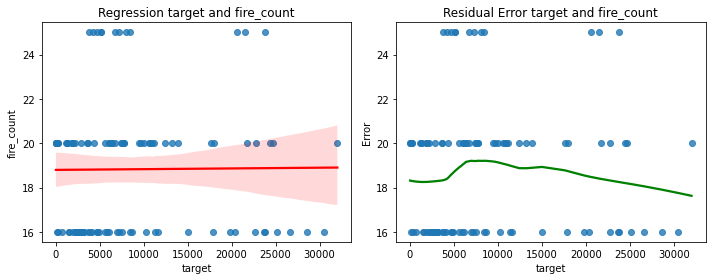

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_min
fire_min
Regression
slope:  -1.0258380330650463e-05
intersept:  1.4427662022800567
r2:  -0.029053424849151122
P_value:  0.7719156409712538
std error:  3.529377315331818e-05


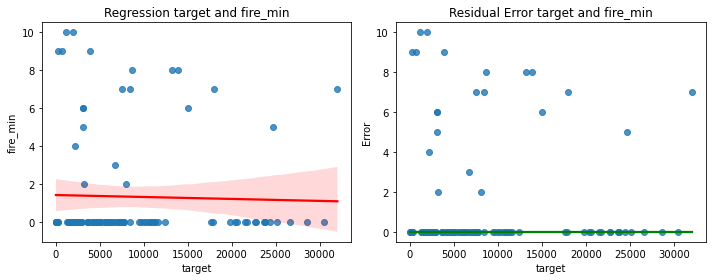

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_max
fire_max
Regression
slope:  2.4771860799133823e-05
intersept:  2.077208840413938
r2:  0.058998298542447064
P_value:  0.5558455673080395
std error:  4.1914277005848515e-05


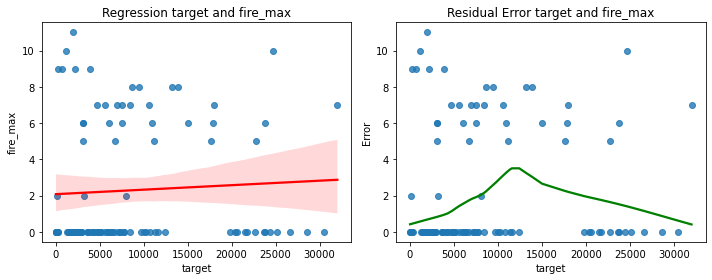

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_mean
fire_mean
Regression
slope:  2.2757328259915173e-05
intersept:  1.7516378229539198
r2:  0.058663738228846816
P_value:  0.5580922794001287
std error:  3.872602782111592e-05


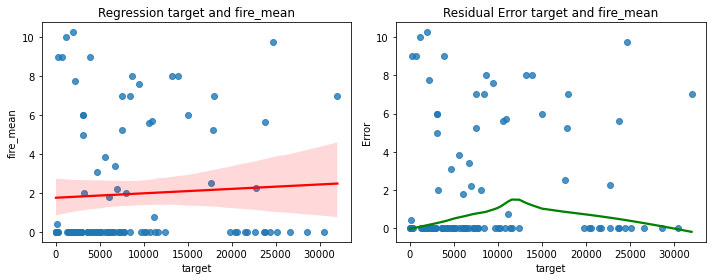

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_sum
fire_sum
Regression
slope:  0.0004850510196396415
intersept:  32.02727788682642
r2:  0.06664537755456737
P_value:  0.5057113478284498
std error:  0.0007261908263743629


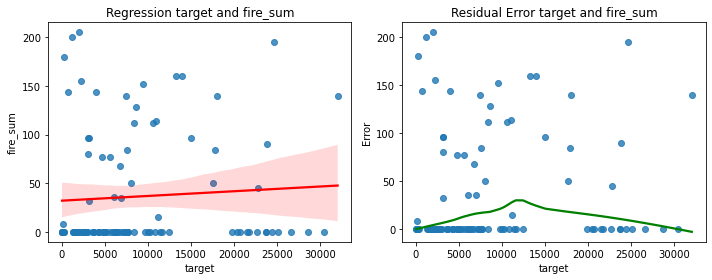

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_std
fire_std
Regression
slope:  9.126050344857906e-06
intersept:  0.2758168942148935
r2:  0.08630050352379237
P_value:  0.38843390905551156
std error:  1.0535283186447224e-05


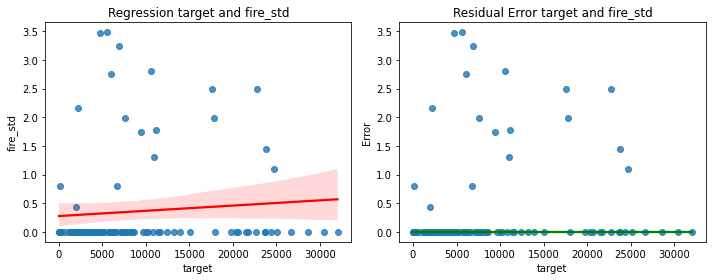

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_med
fire_med
Regression
slope:  2.1996066238393792e-05
intersept:  1.7338673551823023
r2:  0.0543923382916184
P_value:  0.5871521277417951
std error:  4.037977563460461e-05


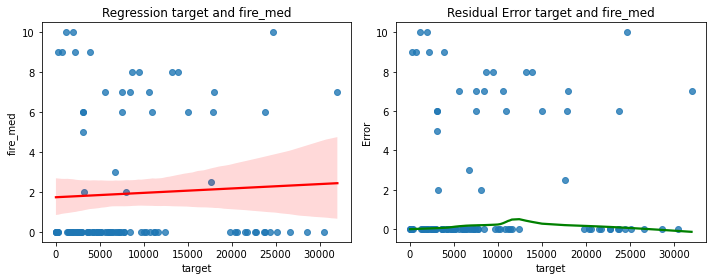

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_major
fire_major
Regression
slope:  1.8696790343417622e-05
intersept:  1.738246862522992
r2:  0.04616391019341342
P_value:  0.6449906850769414
std error:  4.0457702159430773e-05


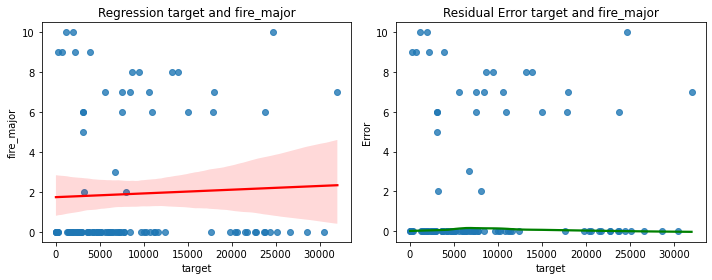

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_minor
fire_minor
Regression
slope:  -1.0781861664886609e-05
intersept:  1.7904871948523826
r2:  -0.028579445313443985
P_value:  0.7755375308029172
std error:  3.771052033166688e-05


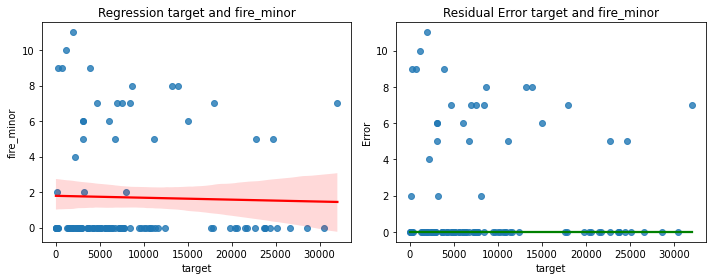

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
burnt_enco
burnt_enco
Regression
slope:  2.8890157262213317e-06
intersept:  0.24921283658293067
r2:  0.052467861813895886
P_value:  0.6004666148895595
std error:  5.4986735387807856e-06


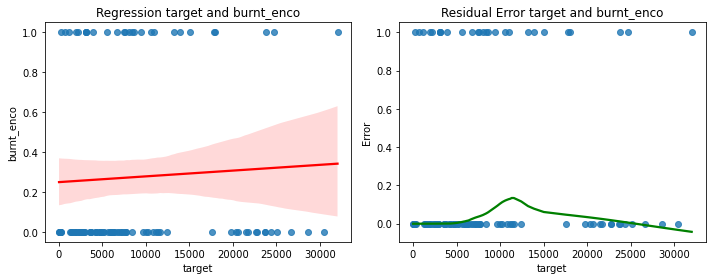

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_sn_ord
fire_sn_ord
Regression
slope:  4.869006186378326e-06
intersept:  0.39854219575528393
r2:  0.05182174099342282
P_value:  0.6049667496962623
std error:  9.38305787745733e-06


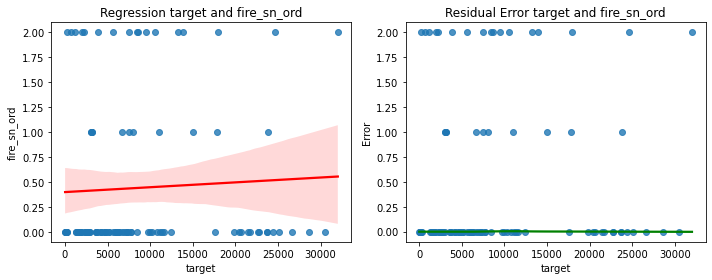

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_f
fire_f
Regression
slope:  -2.4908969420130053e-05
intersept:  1.0032353455095027
r2:  -0.22074729939057205
P_value:  0.025777876561048522
std error:  1.100556655399306e-05


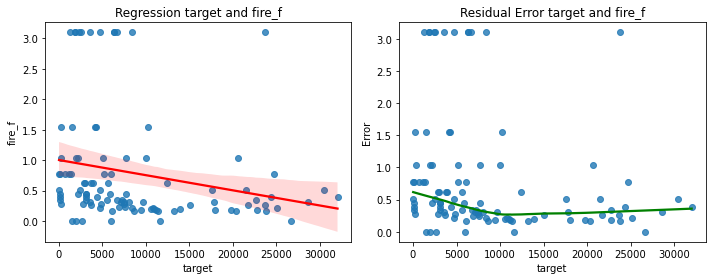

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_tot
fire_tot
Regression
slope:  0.00022713312960545595
intersept:  5.49155585216495
r2:  0.3355735251921725
P_value:  0.0005649571286697862
std error:  6.376027185318036e-05


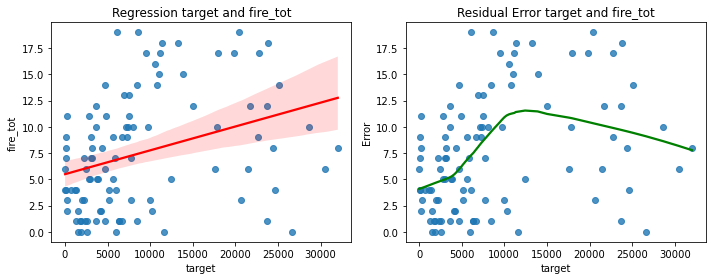

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
since_fire
since_fire
Regression
slope:  -0.00011368526307353373
intersept:  6.858202603082691
r2:  -0.1264678540750013
P_value:  0.20529351342743649
std error:  8.917084227942114e-05


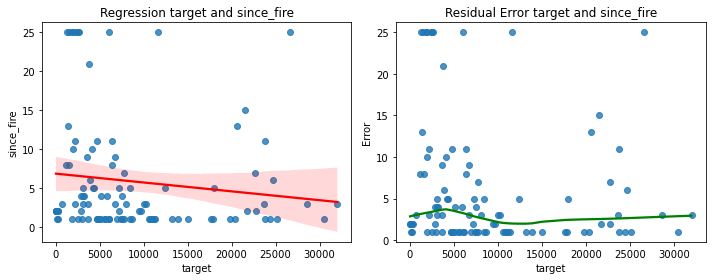

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_gap
fire_gap
Regression
slope:  -0.00011004074363807642
intersept:  6.077270642431289
r2:  -0.22138567518147434
P_value:  0.02534168314892559
std error:  4.847207440624619e-05


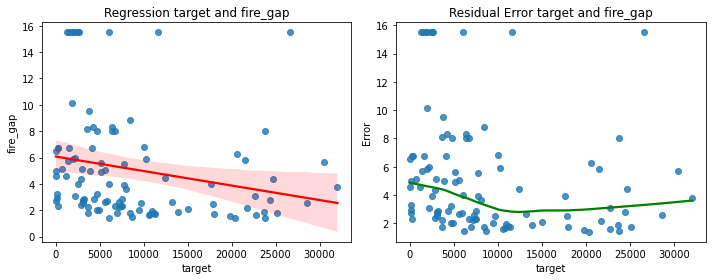

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_pois1_2
fire_pois1_2
Regression
slope:  0.0002938972617942711
intersept:  5.152373447873918
r2:  0.3436413017963661
P_value:  0.00040598689428489847
std error:  8.031607548910825e-05


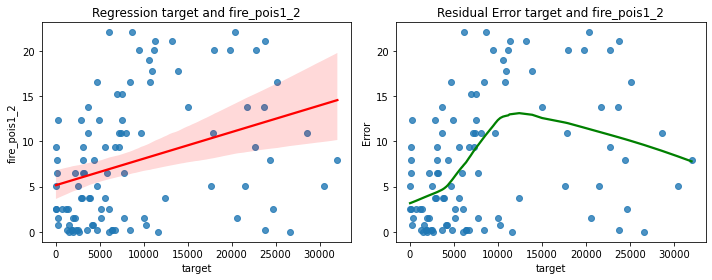

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_pois1_5
fire_pois1_5
Regression
slope:  0.00012074908555739368
intersept:  0.9318565088188877
r2:  0.32710109648633734
P_value:  0.0007917737256330134
std error:  3.4884199768104673e-05


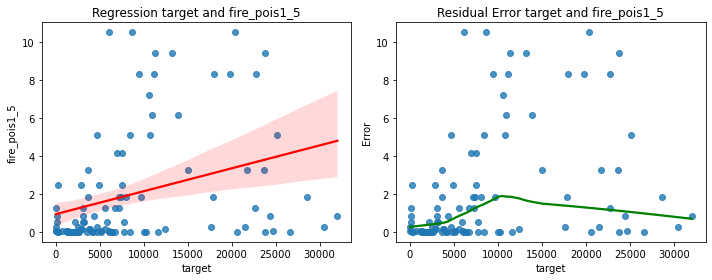

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
fire_pois1_10
fire_pois1_10
Regression
slope:  3.9253854342221166e-05
intersept:  0.18083213977291945
r2:  0.2850606988456215
P_value:  0.0036843184047678423
std error:  1.3199010297931587e-05


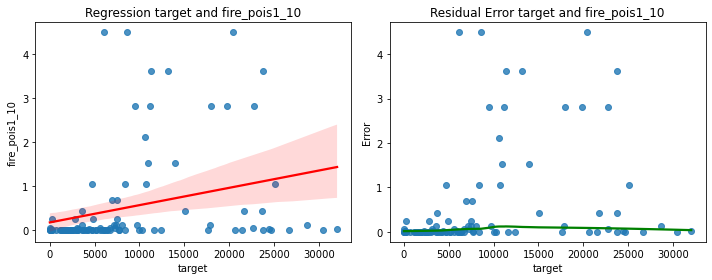

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_an_emsi_avg_si
tot_an_emsi_avg_si
Regression
slope:  -5.1523846860126195e-05
intersept:  10.702869912720269
r2:  -0.428736550783771
P_value:  6.932242851356836e-06
std error:  1.0857055741400126e-05


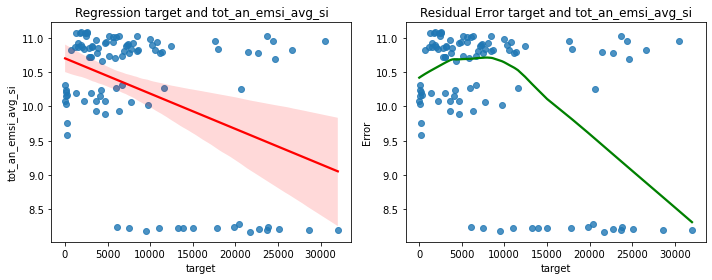

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_an_drsi_avg_si
tot_an_drsi_avg_si
Regression
slope:  -7.446357659854943e-05
intersept:  11.93631625173251
r2:  -0.5635736438912603
P_value:  6.960667852685152e-10
std error:  1.091460122960737e-05


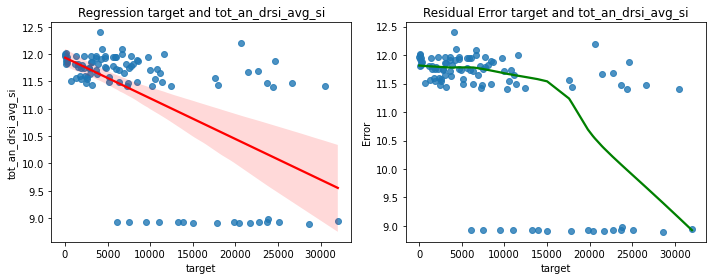

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_djf
tot_avg_emse_djf
Regression
slope:  0.0038503020283870938
intersept:  336.685271500555
r2:  0.4733056767967701
P_value:  5.065251005142358e-07
std error:  0.0007166033507994107


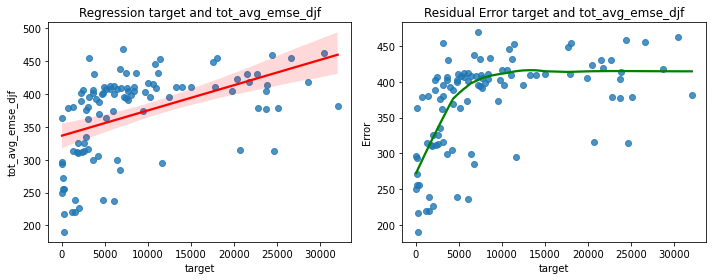

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_mam
tot_avg_emse_mam
Regression
slope:  0.005700744005714668
intersept:  213.58673572238743
r2:  0.6202741923911541
P_value:  3.5862156820484625e-12
std error:  0.0007209035129947551


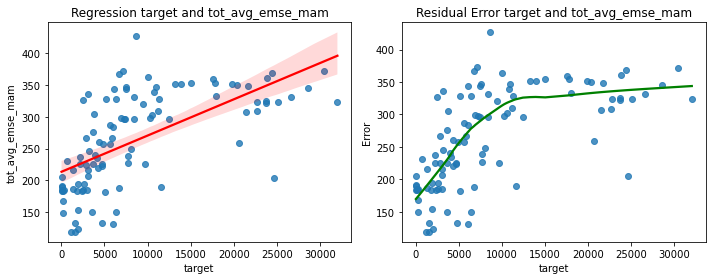

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_jja
tot_avg_emse_jja
Regression
slope:  0.005624135682928674
intersept:  67.64920463557559
r2:  0.6035054492951564
P_value:  1.8985058774097735e-11
std error:  0.0007430677711530799


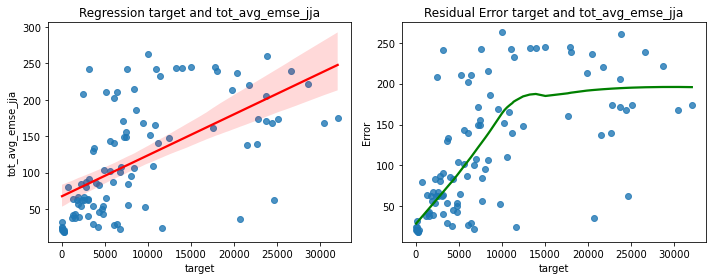

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_son
tot_avg_emse_son
Regression
slope:  0.0004893235062514953
intersept:  221.57123944036618
r2:  0.03424837070665187
P_value:  0.7325549153614014
std error:  0.0014279115640742238


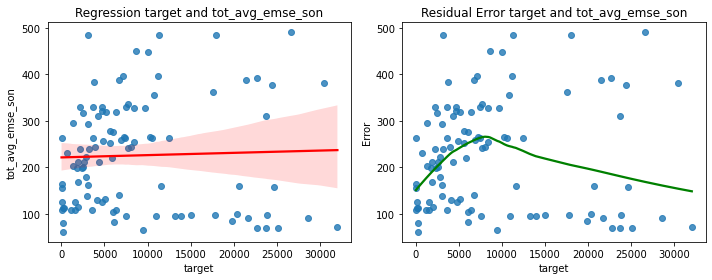

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_dry
tot_avg_emse_dry
Regression
slope:  0.009222672702576202
intersept:  149.03017200247388
r2:  0.5864267634437196
P_value:  9.407666190702742e-11
std error:  0.0012738821180374091


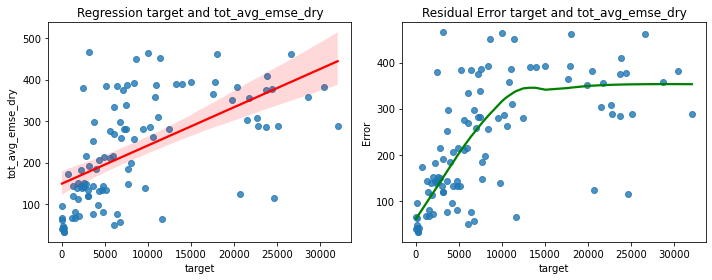

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_wet
tot_avg_emse_wet
Regression
slope:  0.0031154683291461883
intersept:  693.7000571847044
r2:  0.13630338972894473
P_value:  0.1719341429511547
std error:  0.0022643546219271193


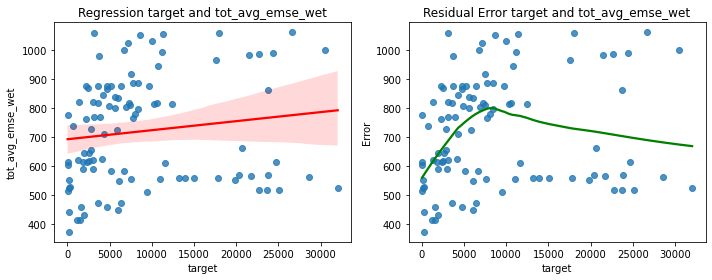

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_emse_annual
tot_avg_emse_annual
Regression
slope:  0.012338141031722377
intersept:  842.7302291871786
r2:  0.3637902459081554
P_value:  0.00017096813349292306
std error:  0.0031591673430080634


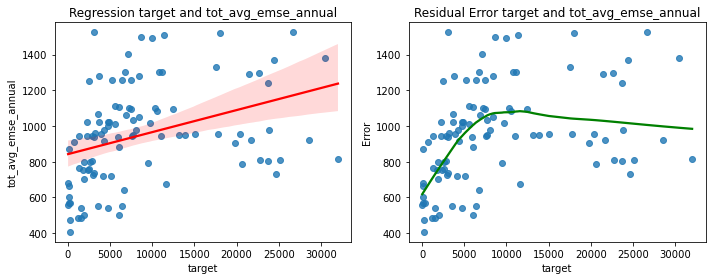

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_djf
tot_avg_drse_djf
Regression
slope:  0.02152147679344589
intersept:  351.2592573611134
r2:  0.5866159009492031
P_value:  9.24708711181343e-11
std error:  0.0029711940937708968


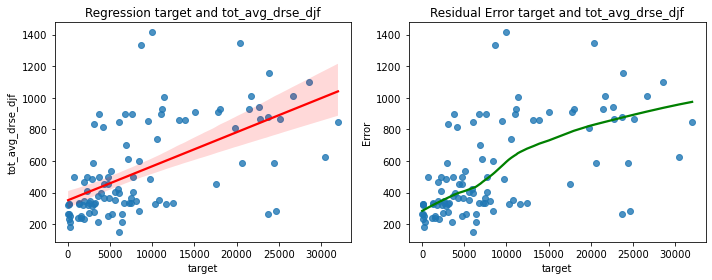

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_mam
tot_avg_drse_mam
Regression
slope:  0.0037789145131458405
intersept:  233.51280998913816
r2:  0.2346473927495849
P_value:  0.01760324554174037
std error:  0.0015655018646356324


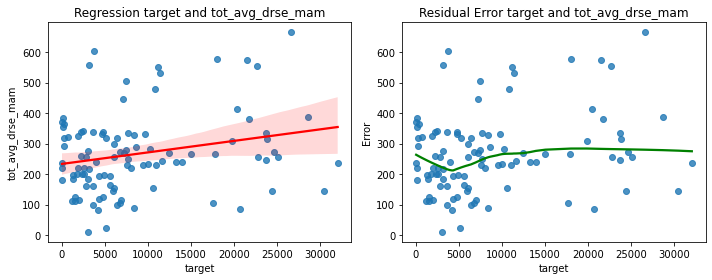

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_jja
tot_avg_drse_jja
Regression
slope:  -7.785547977732739e-06
intersept:  0.801505600835367
r2:  -0.030397286753642273
P_value:  0.7616734133878766
std error:  2.560080544580379e-05


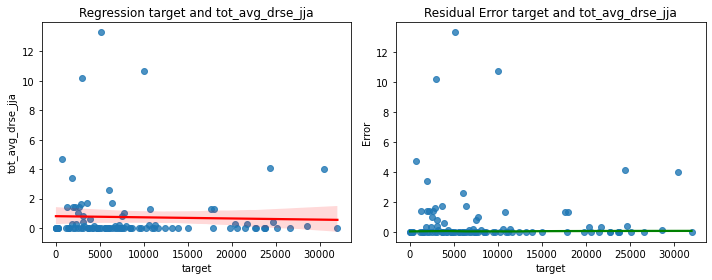

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_son
tot_avg_drse_son
Regression
slope:  0.00024202826507739068
intersept:  72.94789490749596
r2:  0.032001091785473834
P_value:  0.7495037786495737
std error:  0.0007559251666402372


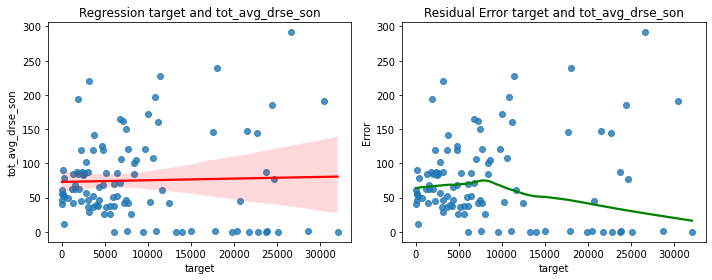

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_dry
tot_avg_drse_dry
Regression
slope:  0.0007385361070502548
intersept:  13.8797558618128
r2:  0.18363039703989334
P_value:  0.06468016120321209
std error:  0.0003953471636168494


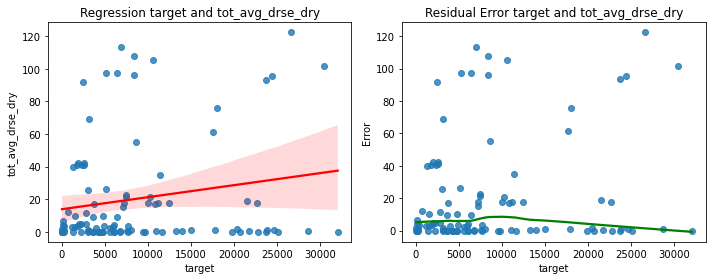

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_wet
tot_avg_drse_wet
Regression
slope:  0.014680279962045925
intersept:  648.4463660233663
r2:  0.36948537051184766
P_value:  0.00013248646002108805
std error:  0.003692014286664429


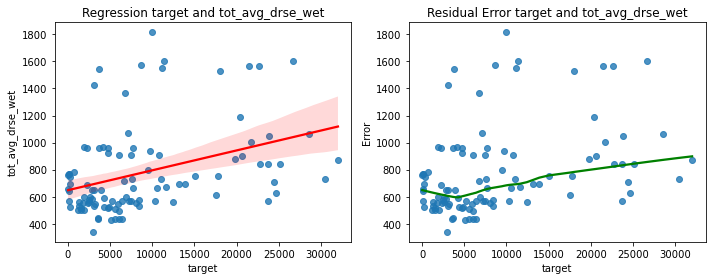

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
tot_avg_drse_annual
tot_avg_drse_annual
Regression
slope:  0.01541881606909618
intersept:  662.3261218851792
r2:  0.3834990476957608
P_value:  6.930708406472373e-05
std error:  0.003713154722324962


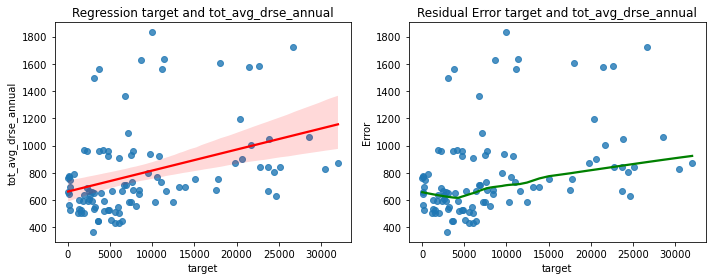

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0015965879447511209
intersept:  10.529749505678803
r2:  0.724586808541154
P_value:  7.421335282876948e-18
std error:  0.00015185787604744523


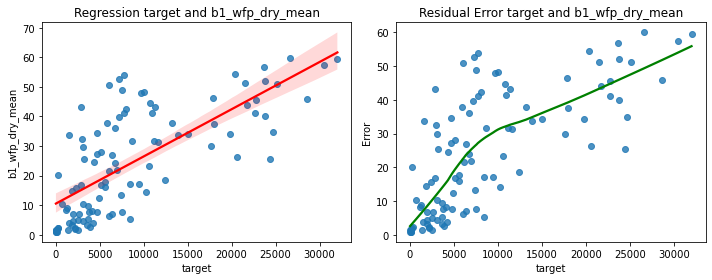

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_wfp_dry_p50
b1_wfp_dry_p50
Regression
slope:  0.0016261298784664537
intersept:  10.187657676769076
r2:  0.7212288315993723
P_value:  1.2395393351062085e-17
std error:  0.00015617998750154288


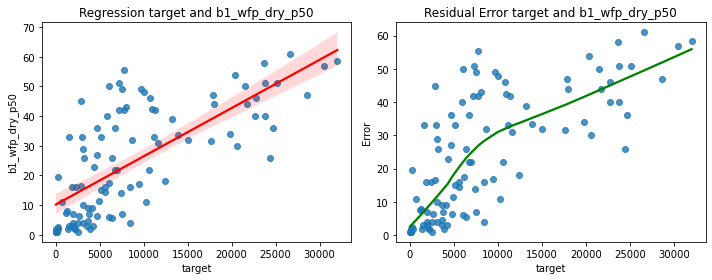

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_wfp_dry_p99
b1_wfp_dry_p99
Regression
slope:  0.0016674195922419758
intersept:  16.721114286291503
r2:  0.7020749358649951
P_value:  2.0159490932054638e-16
std error:  0.00016912362946565977


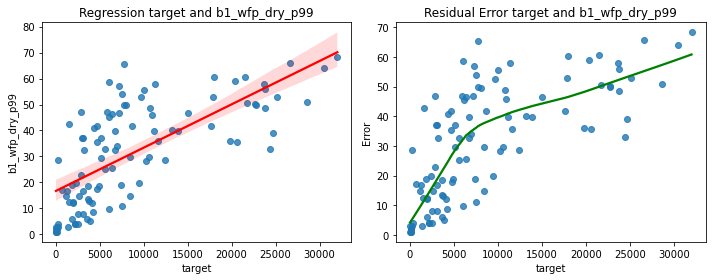

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_wdc_dry_major
b1_wdc_dry_major
Regression
slope:  6.836979280973317e-05
intersept:  1.4895717423898005
r2:  0.6410741506330327
P_value:  3.9326694145418647e-13
std error:  8.185071338364475e-06


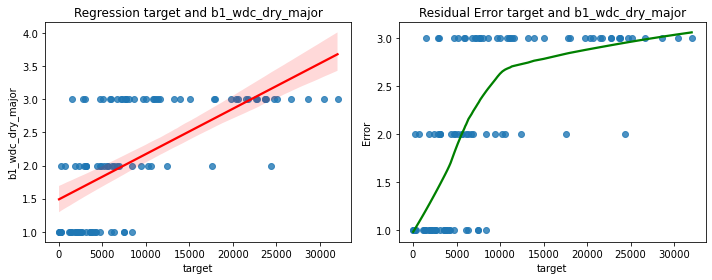

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_n17_dry_major
b1_n17_dry_major
Regression
slope:  -1.7517456251251035e-05
intersept:  4.672995211237018
r2:  -0.052237088703128653
P_value:  0.602072203919531
std error:  3.3488734345751026e-05


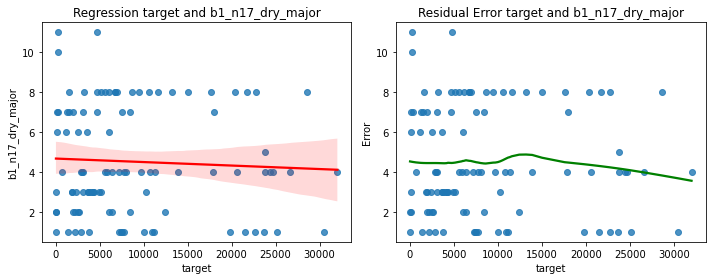

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hsd_mean
b1_hsd_mean
Regression
slope:  0.00010196547016594467
intersept:  101.97938795066065
r2:  0.6845148720447713
P_value:  2.155033667051322e-15
std error:  1.0859181909327715e-05


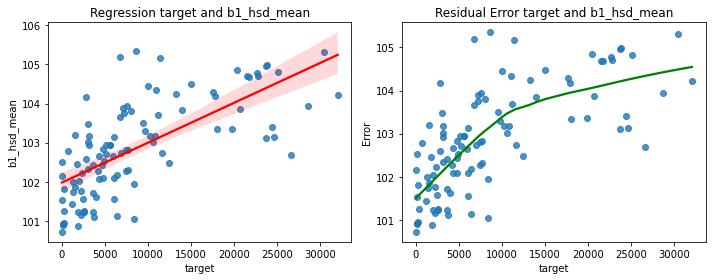

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hsd_p50
b1_hsd_p50
Regression
slope:  0.00010015845349920558
intersept:  101.98460260363873
r2:  0.6698802644333914
P_value:  1.3728193327921533e-14
std error:  1.1101172147541106e-05


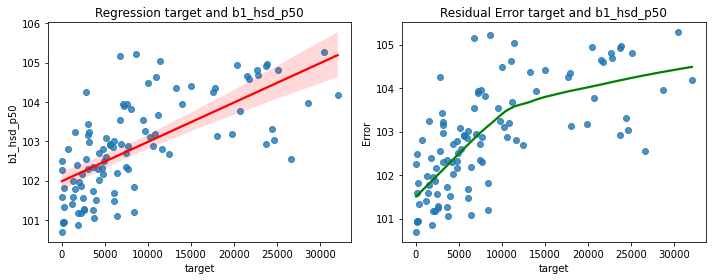

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hsd_p99
b1_hsd_p99
Regression
slope:  0.00011227108812365877
intersept:  102.49647153678723
r2:  0.6826422328313607
P_value:  2.747610750305914e-15
std error:  1.2018360785611402e-05


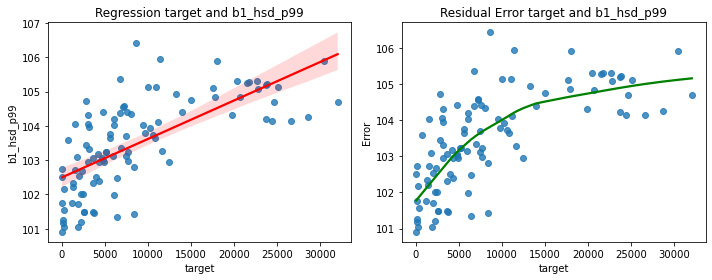

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00023179766822138163
intersept:  103.39266314770529
r2:  0.6994955513910441
P_value:  2.885879497832948e-16
std error:  2.3681520037858268e-05


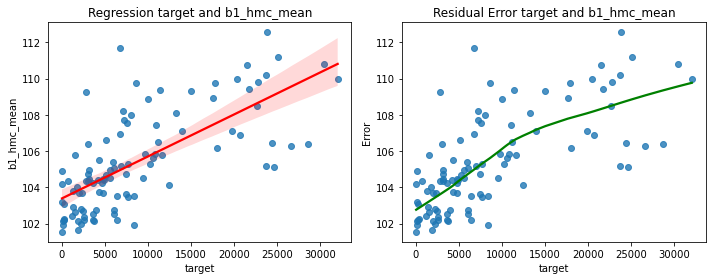

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hmc_p50
b1_hmc_p50
Regression
slope:  0.00023051294421074487
intersept:  103.3899132107107
r2:  0.6924834072794179
P_value:  7.50908240913456e-16
std error:  2.401499126187691e-05


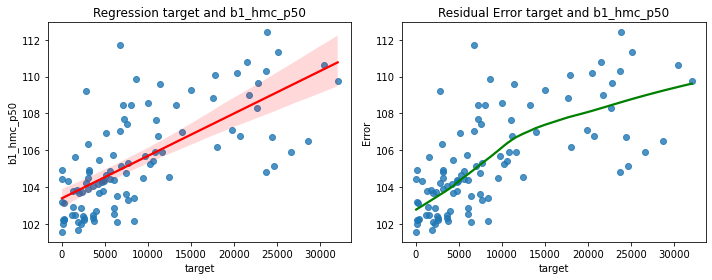

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hmc_p99
b1_hmc_p99
Regression
slope:  0.0002750358898225532
intersept:  104.26826280269499
r2:  0.7116705734369856
P_value:  5.128339144549106e-17
std error:  2.7149693859415694e-05


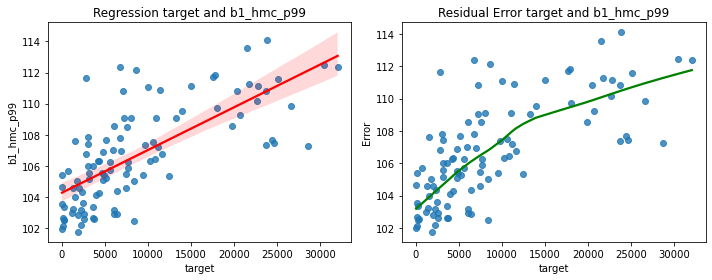

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hcv_mean
b1_hcv_mean
Regression
slope:  1.938161993891753e-06
intersept:  153.68377580957605
r2:  0.0017943445370205726
P_value:  0.9857196996457088
std error:  0.00010801486747824955


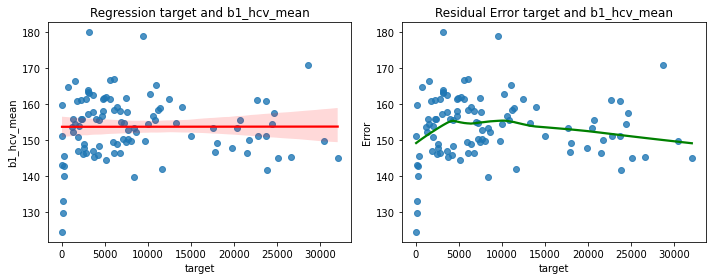

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hcv_p50
b1_hcv_p50
Regression
slope:  -1.1002563240272396e-05
intersept:  153.71680837591248
r2:  -0.01018790366605062
P_value:  0.9190525087647136
std error:  0.00010799073675478115


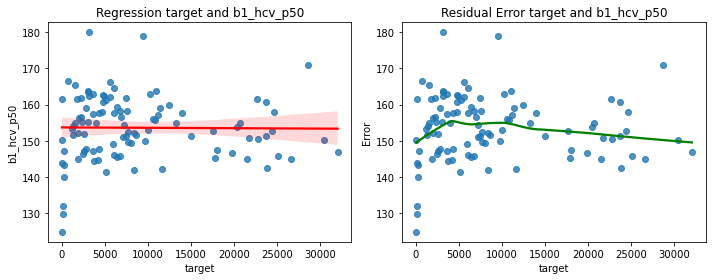

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_hcv_p99
b1_hcv_p99
Regression
slope:  -1.9671820071099497e-05
intersept:  161.181249550393
r2:  -0.0160006050958544
P_value:  0.8731829696622855
std error:  0.0001229284868206201


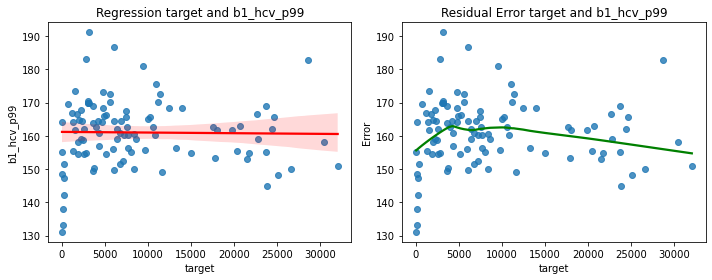

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_h99_mean
b1_h99_mean
Regression
slope:  0.0003631652279465546
intersept:  107.88718621377629
r2:  0.6809553501393729
P_value:  3.414468138772937e-15
std error:  3.9056151342054916e-05


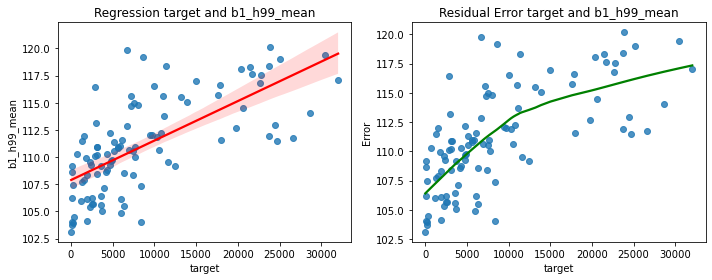

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_h99_p50
b1_h99_p50
Regression
slope:  0.0003598573632579446
intersept:  107.93610937434434
r2:  0.6705379316539413
P_value:  1.2660529778646017e-14
std error:  3.981419360094627e-05


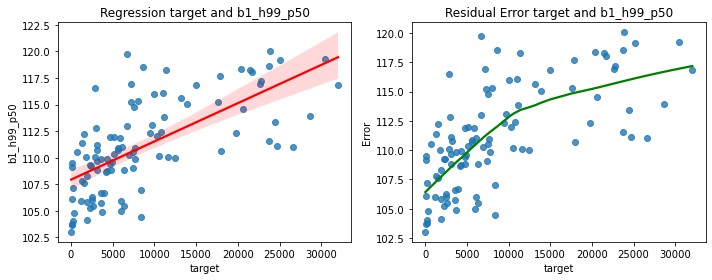

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_h99_p99
b1_h99_p99
Regression
slope:  0.0003924352579699716
intersept:  109.68887837386285
r2:  0.6770221836980066
P_value:  5.635471023577098e-15
std error:  4.2660001920587185e-05


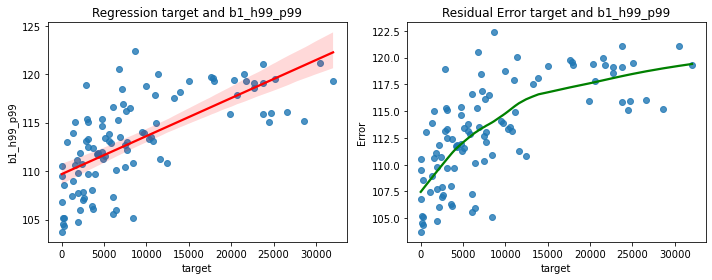

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_fdc_dry_major
b1_fdc_dry_major
Regression
slope:  5.7083363947147487e-05
intersept:  1.8236927441259
r2:  0.633948266993831
P_value:  8.545037409083097e-13
std error:  6.9637973440464935e-06


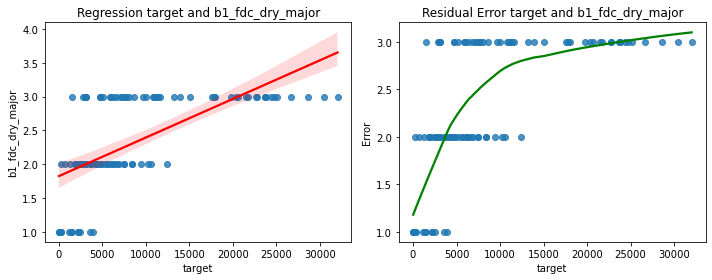

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.00225249563219341
intersept:  18.153745536414043
r2:  0.713535206384917
P_value:  3.905161688499693e-17
std error:  0.00022117227978363788


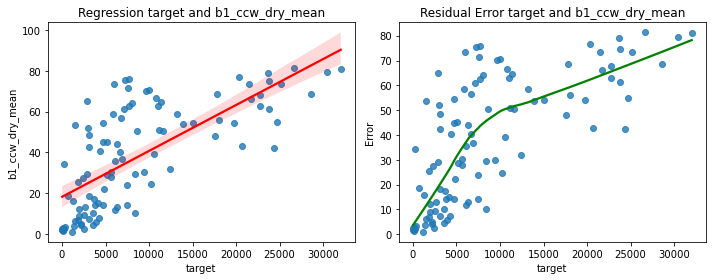

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_ccw_dry_p50
b1_ccw_dry_p50
Regression
slope:  0.0023090129411846225
intersept:  17.605216154592462
r2:  0.7120606008290715
P_value:  4.845084092069597e-17
std error:  0.0002276771907790872


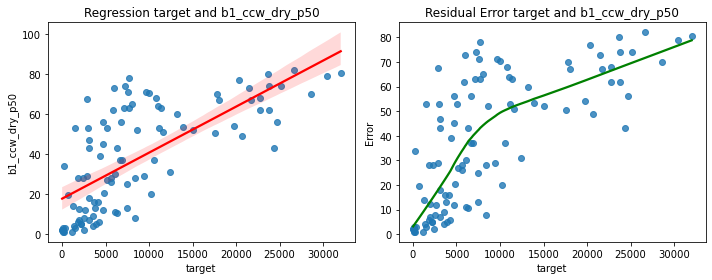

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_ccw_dry_p99
b1_ccw_dry_p99
Regression
slope:  0.0022082121991344006
intersept:  27.750402487736206
r2:  0.683986704540488
P_value:  2.3082857510463028e-15
std error:  0.0002355131447180277


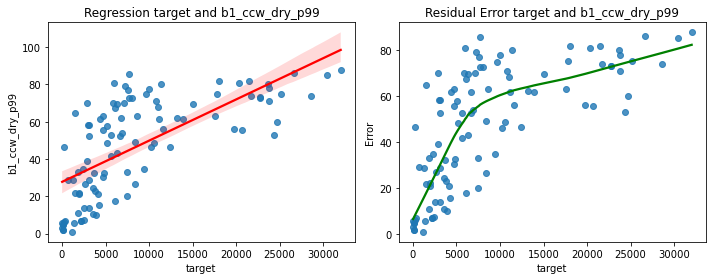

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.009611559987406482
intersept:  481.76675399338455
r2:  -0.630904303163882
P_value:  1.18315886664435e-12
std error:  0.0011819908687366939


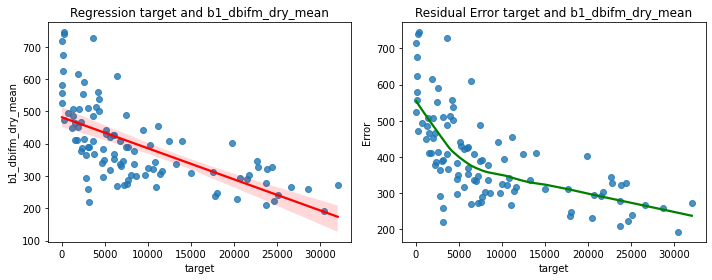

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.0003378601110268832
intersept:  13.643811188455144
r2:  -0.2929165847450875
P_value:  0.002811086073391016
std error:  0.00011028426096154994


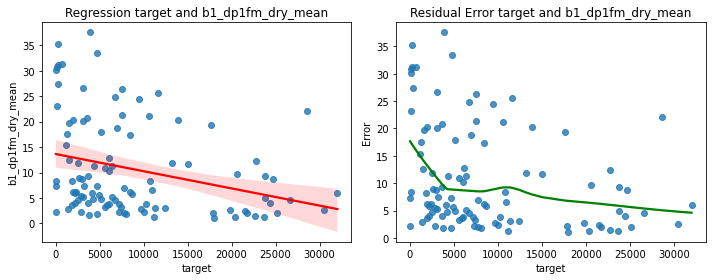

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_dp1fm_dry_p50
b1_dp1fm_dry_p50
Regression
slope:  -0.00034556188903057207
intersept:  13.717005558655552
r2:  -0.29014947940840957
P_value:  0.0030947659967746903
std error:  0.00011397445182290238


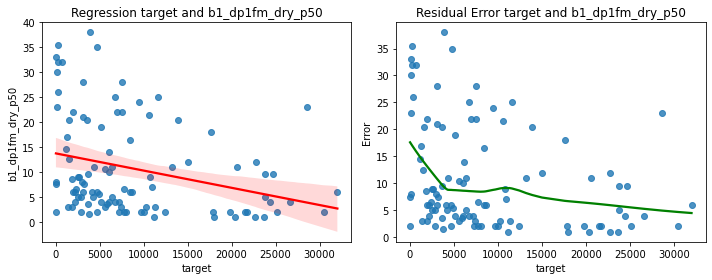

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_dp1fm_dry_p99
b1_dp1fm_dry_p99
Regression
slope:  -0.00042895823234602383
intersept:  18.262441543316914
r2:  -0.3159578530293863
P_value:  0.0012165087416014908
std error:  0.00012880961248031033


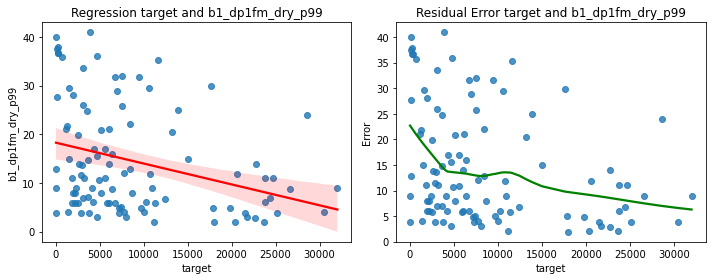

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0013465562205139767
intersept:  16.03600881682261
r2:  0.7165908906666018
P_value:  2.4869516912000234e-17
std error:  0.0001310670461256539


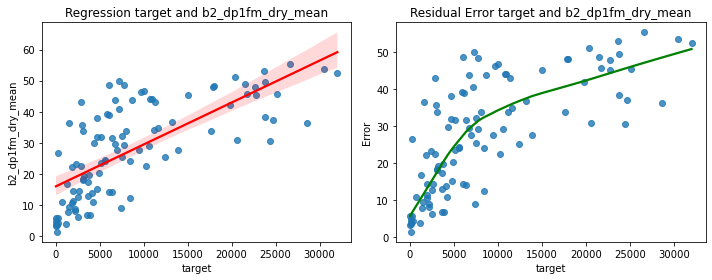

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b2_dp1fm_dry_p50
b2_dp1fm_dry_p50
Regression
slope:  0.001362390499157714
intersept:  15.874478732142512
r2:  0.7152389260229358
P_value:  3.0387105431788554e-17
std error:  0.00013312299723846837


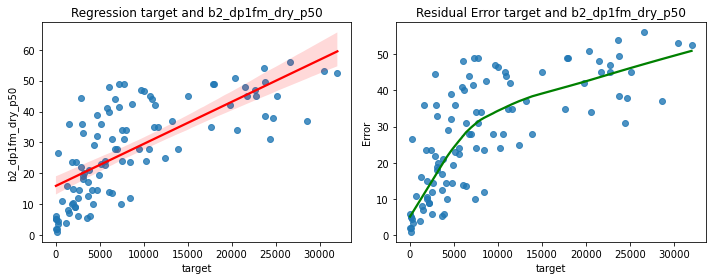

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b2_dp1fm_dry_p95
b2_dp1fm_dry_p95
Regression
slope:  0.0013011851277651778
intersept:  21.348644054959344
r2:  0.6938341984449861
P_value:  6.258979331451123e-16
std error:  0.00013505080481295283


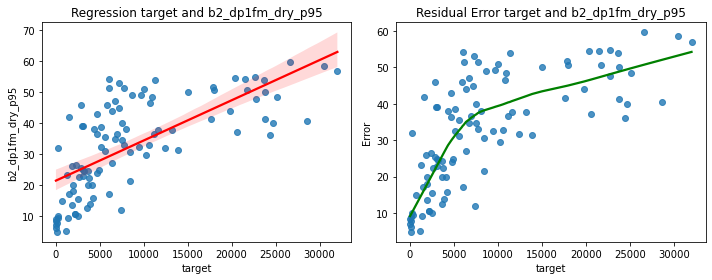

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0010102807446053612
intersept:  68.85711458561295
r2:  -0.5690977694226398
P_value:  4.3513347329679065e-10
std error:  0.00014597200250192845


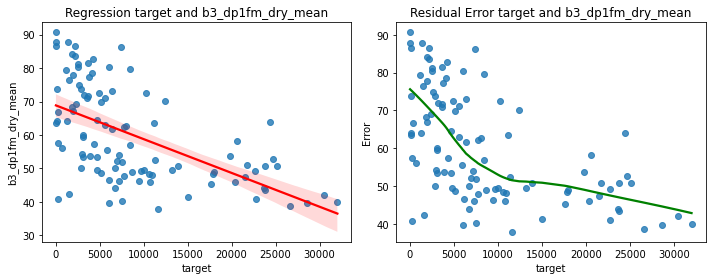

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b3_dp1fm_dry_p50
b3_dp1fm_dry_p50
Regression
slope:  -0.0010182318754464665
intersept:  68.8570775723173
r2:  -0.5630570250088318
P_value:  7.270100982601481e-10
std error:  0.00014944937358090217


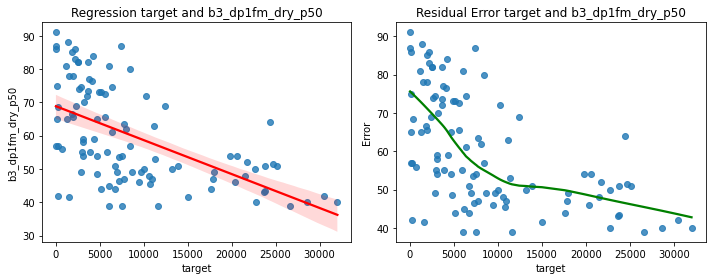

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b3_dp1fm_dry_p99
b3_dp1fm_dry_p99
Regression
slope:  -0.001071041351954693
intersept:  75.33507921376705
r2:  -0.595234135806741
P_value:  4.169995982474107e-11
std error:  0.00014458810516240956


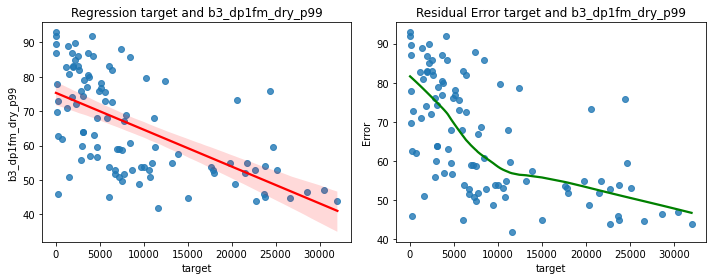

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_dbifm_dry_p50
b1_dbifm_dry_p50
Regression
slope:  -0.009492759303701491
intersept:  478.8759524555061
r2:  -0.621742548607854
P_value:  3.0845857631858602e-12
std error:  0.0011958221173528779


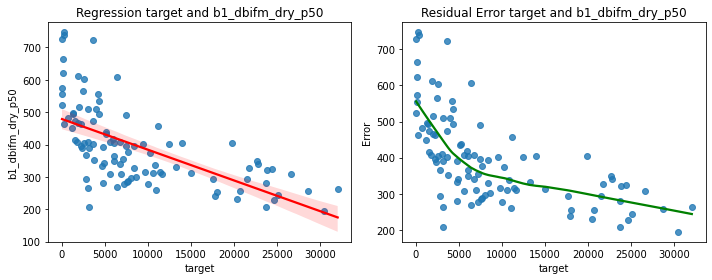

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b1_dbifm_dry_p99
b1_dbifm_dry_p99
Regression
slope:  -0.010057531849135846
intersept:  545.1944819222861
r2:  -0.6301405194649154
P_value:  1.2831037526460757e-12
std error:  0.001239324139234312


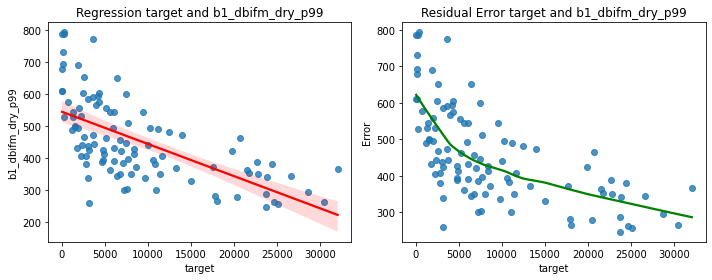

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.014177263724428752
intersept:  793.042007174816
r2:  -0.6299376009771958
P_value:  1.3109985926649117e-12
std error:  0.001747905122951085


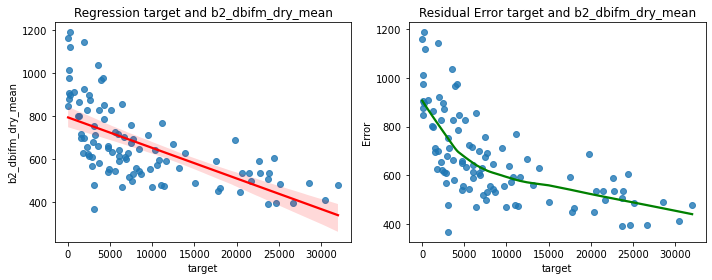

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b2_dbifm_dry_p50
b2_dbifm_dry_p50
Regression
slope:  -0.014336309342890225
intersept:  793.2088953210178
r2:  -0.6317919702899759
P_value:  1.076440019814989e-12
std error:  0.001758904600871382


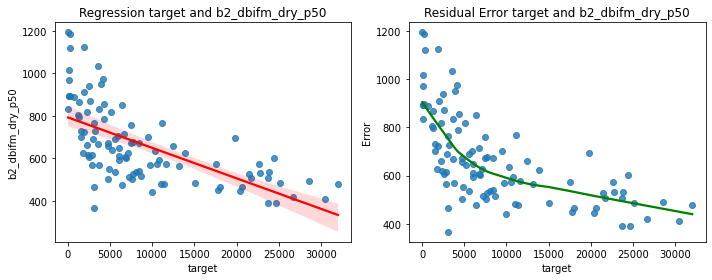

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b2_dbifm_dry_p99
b2_dbifm_dry_p99
Regression
slope:  -0.01502929355472846
intersept:  872.2204713864533
r2:  -0.6325973092097343
P_value:  9.877114205170432e-13
std error:  0.0018400174066971506


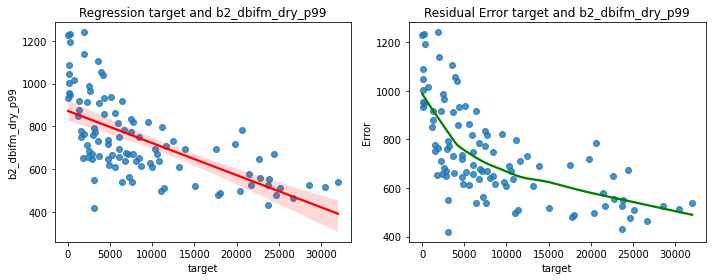

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.022769726610372614
intersept:  1137.9513489865521
r2:  -0.6367609511947975
P_value:  6.305645276048608e-13
std error:  0.002757212799685147


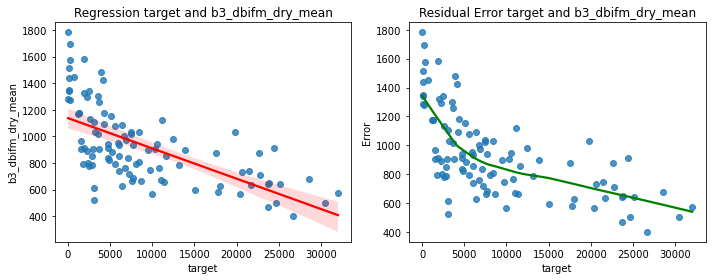

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b3_dbifm_dry_p50
b3_dbifm_dry_p50
Regression
slope:  -0.02294171960073685
intersept:  1138.0453826677353
r2:  -0.6380950281541209
P_value:  5.453238553961282e-13
std error:  0.002768263506218117


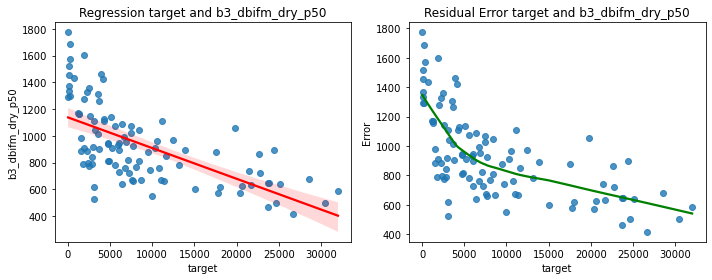

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b3_dbifm_dry_p99
b3_dbifm_dry_p99
Regression
slope:  -0.023709930423908808
intersept:  1252.146446671329
r2:  -0.6294731104161115
P_value:  1.377074060561663e-12
std error:  0.002926756295264033


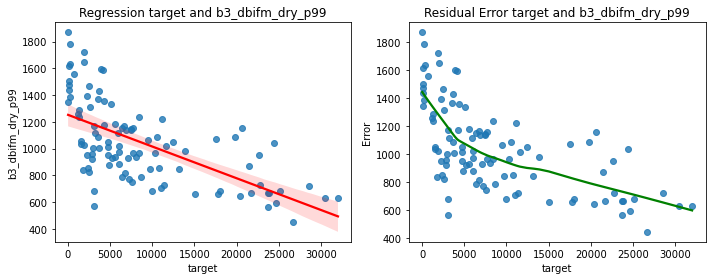

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  0.000547087305994602
intersept:  2070.3909163293265
r2:  0.0144435201873198
P_value:  0.8854356456460767
std error:  0.003787374757255202


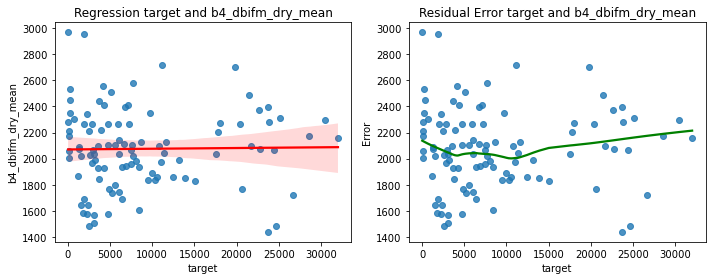

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b4_dbifm_dry_p50
b4_dbifm_dry_p50
Regression
slope:  -4.868416408042657e-05
intersept:  2072.3037420862083
r2:  -0.001276570424595096
P_value:  0.9898401437725765
std error:  0.003813665386084365


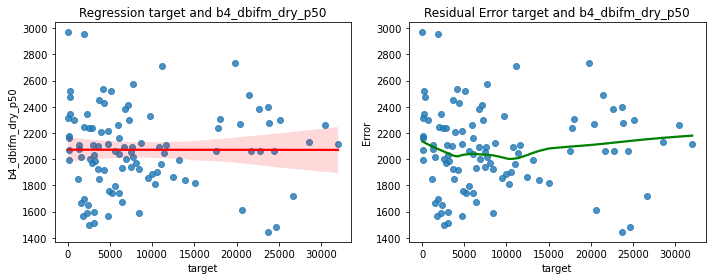

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b4_dbifm_dry_p99
b4_dbifm_dry_p99
Regression
slope:  0.0018882195753718739
intersept:  2182.9158699015875
r2:  0.04706884230685365
P_value:  0.6385166558107016
std error:  0.004007166249793078


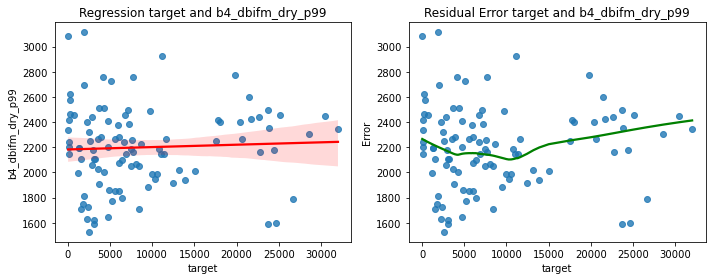

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.035672235564135756
intersept:  2703.102138661939
r2:  -0.6350957923742319
P_value:  7.551434691862536e-13
std error:  0.004338625134012275


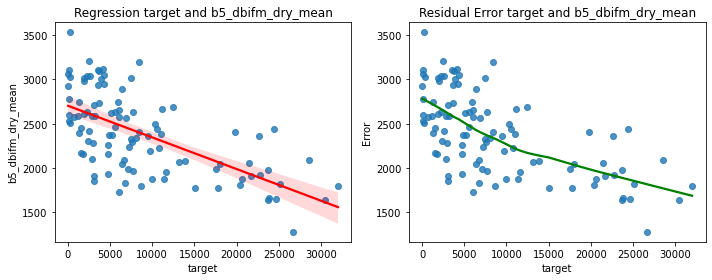

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b5_dbifm_dry_p50
b5_dbifm_dry_p50
Regression
slope:  -0.035878542179474365
intersept:  2698.2843244071105
r2:  -0.6322265282895683
P_value:  1.0276474651872734e-12
std error:  0.004396858499199534


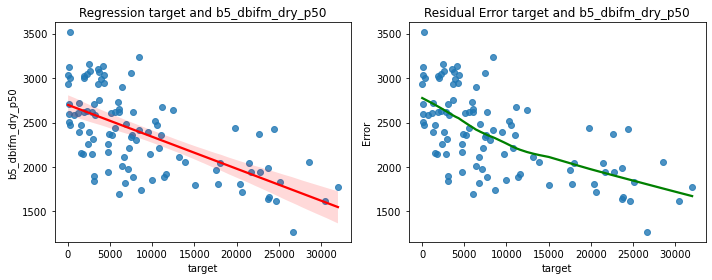

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b5_dbifm_dry_p99
b5_dbifm_dry_p99
Regression
slope:  -0.03536244280126555
intersept:  2887.3893426960235
r2:  -0.6124217890761408
P_value:  7.922698382088708e-12
std error:  0.004564683076561886


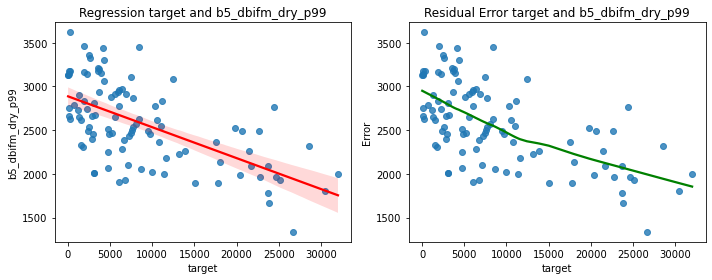

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.03517752785298669
intersept:  1817.9089915767565
r2:  -0.654540486626467
P_value:  8.57306781028458e-14
std error:  0.004063180152603024


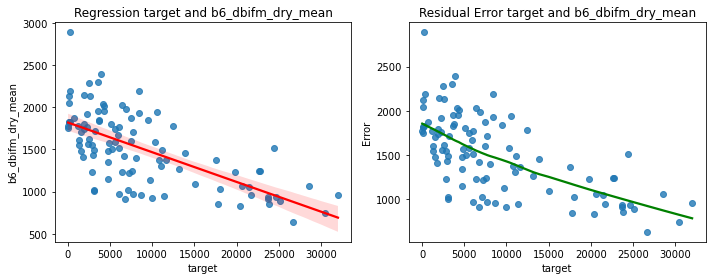

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b6_dbifm_dry_p50
b6_dbifm_dry_p50
Regression
slope:  -0.03571129264298063
intersept:  1823.3247462601253
r2:  -0.6555648514511923
P_value:  7.610997794997913e-14
std error:  0.004113549622112675


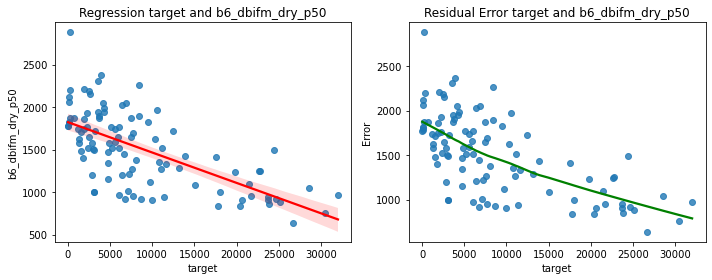

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
b6_dbifm_dry_p99
b6_dbifm_dry_p99
Regression
slope:  -0.03625467000721679
intersept:  1997.9425026258004
r2:  -0.6382402387979957
P_value:  5.367479729192938e-13
std error:  0.0043729921595061965


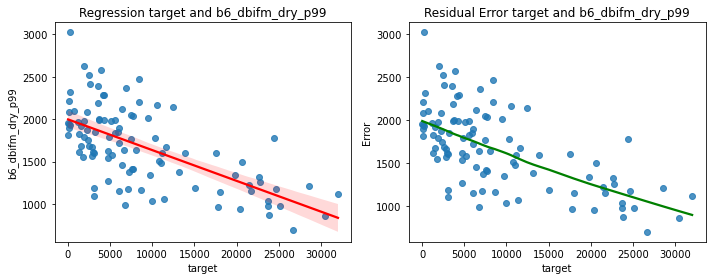

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r32
dbifmdry_r32
Regression
slope:  -54.380008922908274
intersept:  14391870.285481643
r2:  -0.3906907053072544
P_value:  4.912944252645761e-05
std error:  12.812691598089948


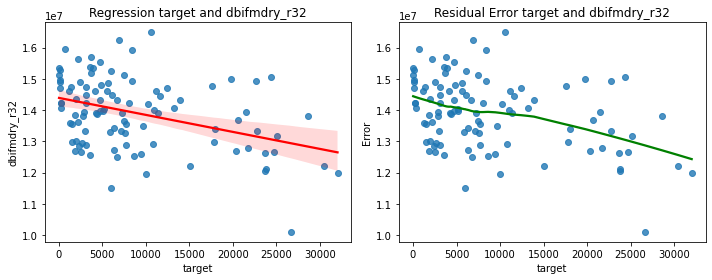

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r42
dbifmdry_r42
Regression
slope:  737.6191262694781
intersept:  26262898.87827649
r2:  0.7422047734738324
P_value:  4.422094603730313e-19
std error:  66.60325611144597


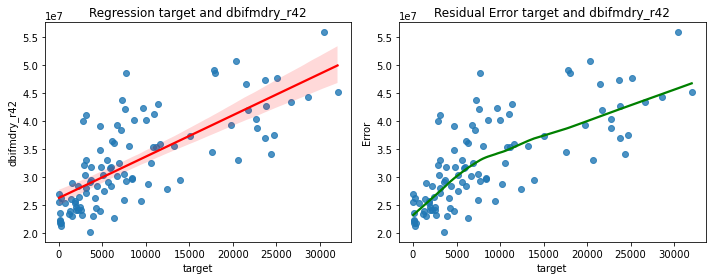

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r43
dbifmdry_r43
Regression
slope:  660.7714268631494
intersept:  18077707.687875308
r2:  0.7555200914822996
P_value:  4.486540257121741e-20
std error:  57.29671539795497


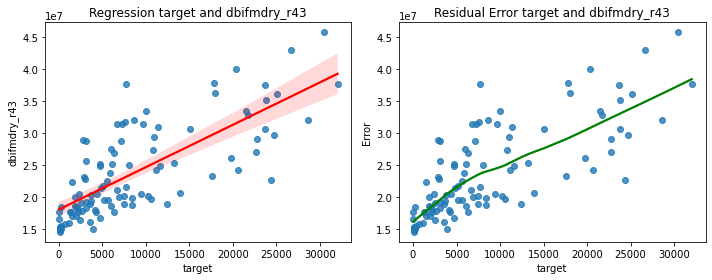

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r52
dbifmdry_r52
Regression
slope:  182.56128628201725
intersept:  35182794.8964567
r2:  0.256775913551505
P_value:  0.009182514789354904
std error:  68.71368130485514


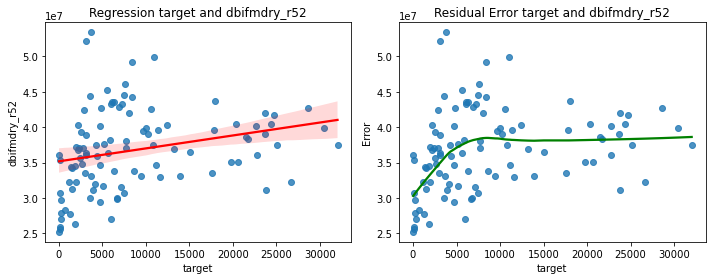

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r53
dbifmdry_r53
Regression
slope:  244.4708263764327
intersept:  24426517.377018467
r2:  0.4547495862372215
P_value:  1.5748813397126835e-06
std error:  47.87919622517276


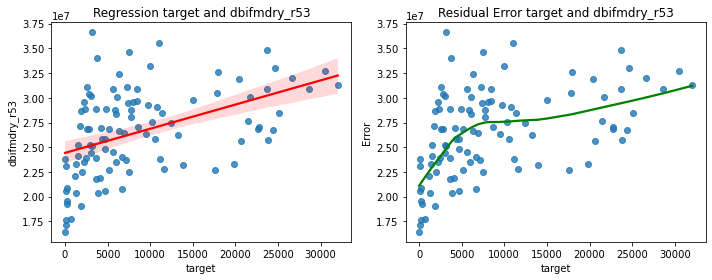

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r54
dbifmdry_r54
Regression
slope:  -176.07887383581448
intersept:  13235041.632969959
r2:  -0.5863764923356087
P_value:  9.450796199875568e-11
std error:  24.32408095282599


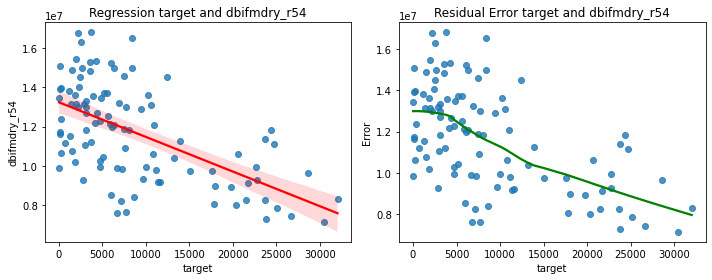

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r62
dbifmdry_r62
Regression
slope:  -101.00051179593676
intersept:  23607077.06859674
r2:  -0.1996504870520179
P_value:  0.04423859341570938
std error:  49.570170226421766


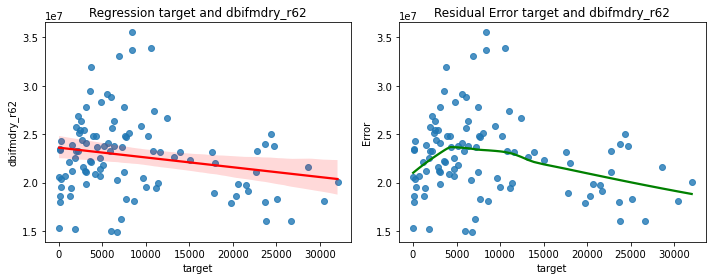

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r63
dbifmdry_r63
Regression
slope:  -12.496208692117055
intersept:  16435789.26380838
r2:  -0.0398445976302816
P_value:  0.6909183238445494
std error:  31.337461172569


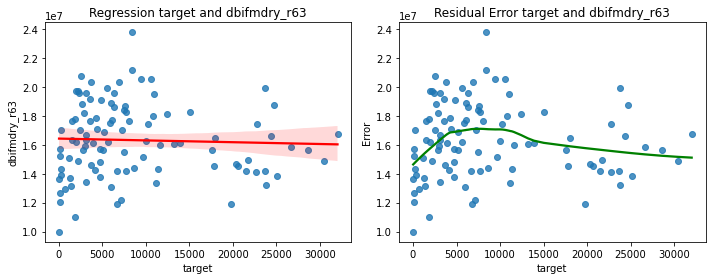

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r64
dbifmdry_r64
Regression
slope:  -169.8540997148565
intersept:  8900436.698302865
r2:  -0.6058634067520999
P_value:  1.510731701103347e-11
std error:  22.303806637822024


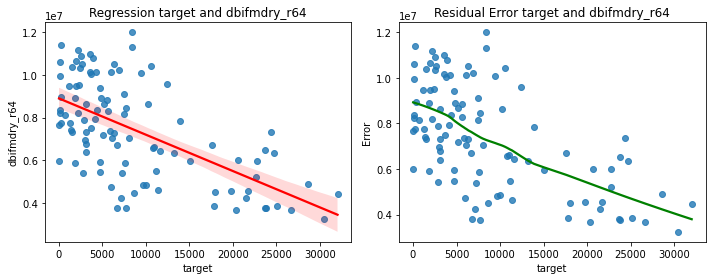

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_r65
dbifmdry_r65
Regression
slope:  -59.76515581916044
intersept:  6742458.276485426
r2:  -0.5494549453593977
P_value:  2.225512037346304e-09
std error:  9.088130597931489


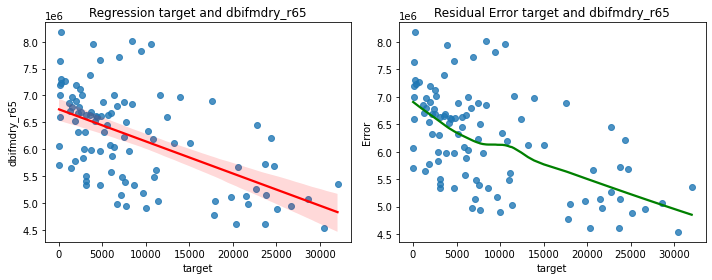

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  33.13915085182295
intersept:  2426688.6499431203
r2:  0.5650511107359218
P_value:  6.143977105621104e-10
std error:  4.83879272065237


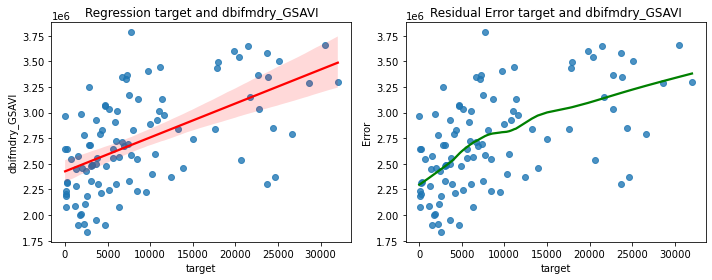

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  77.23464475314996
intersept:  4483782.77158565
r2:  0.7237317046182514
P_value:  8.462963942649038e-18
std error:  7.364358363506393


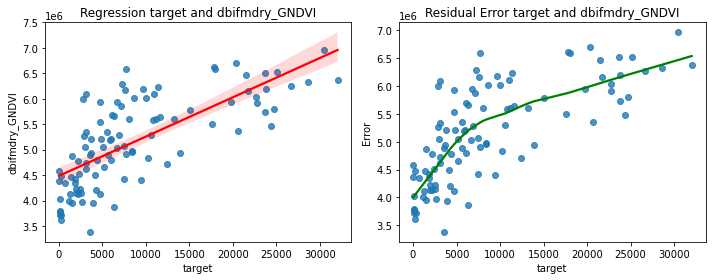

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  805.1791031281056
intersept:  38175543.50951598
r2:  0.6463847390111551
P_value:  2.1763722120650928e-13
std error:  95.04572033788209


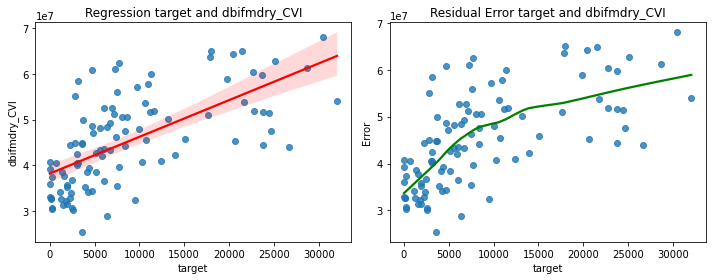

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_NDGI
dbifmdry_NDGI
Regression
slope:  20.05830615541715
intersept:  -1794809.5193661992
r2:  0.4022603534455679
P_value:  2.7769359652339632e-05
std error:  4.5651745109335495


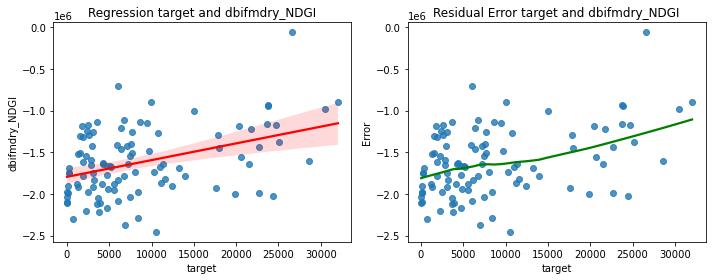

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -20.05830615541715
intersept:  1794809.5193661992
r2:  -0.4022603534455679
P_value:  2.7769359652339632e-05
std error:  4.5651745109335495


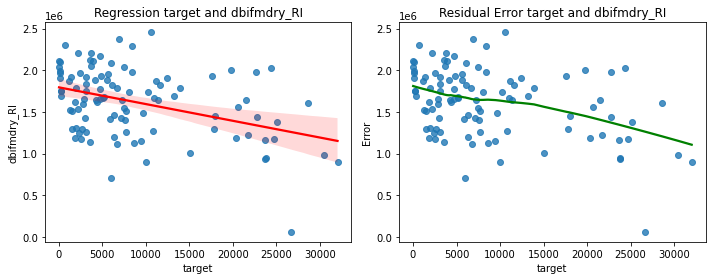

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  122.5445509211578
intersept:  615346.7350072775
r2:  0.6355596415544542
P_value:  7.182336265679959e-13
std error:  14.88620921938638


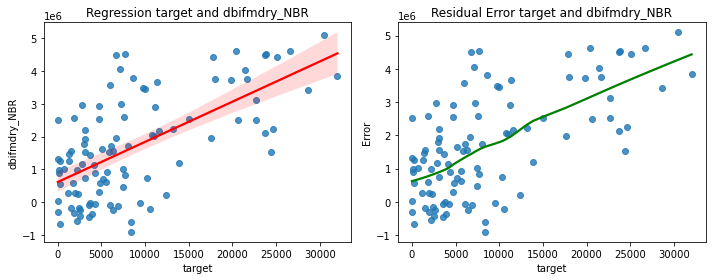

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_NDII
dbifmdry_NDII
Regression
slope:  80.20949501482986
intersept:  -1364546.4517655745
r2:  0.6112988340344294
P_value:  8.857836454562359e-12
std error:  10.38408376464837


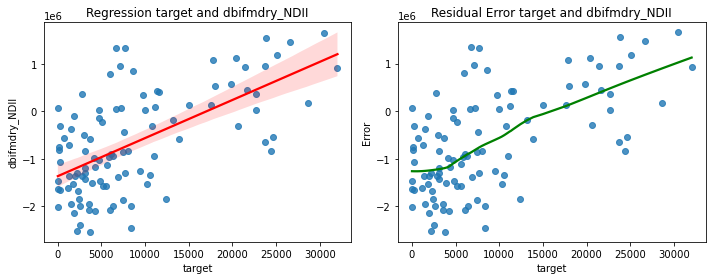

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  14.722335317368822
intersept:  1277410.9616151631
r2:  0.43072208273154816
P_value:  6.217223798615858e-06
std error:  3.0847457587356395


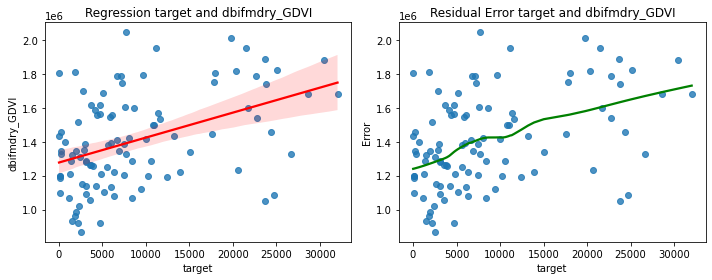

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  45.08089615610004
intersept:  1468242.2145843352
r2:  0.6632111836153978
P_value:  3.084532947733029e-14
std error:  5.087368877240596


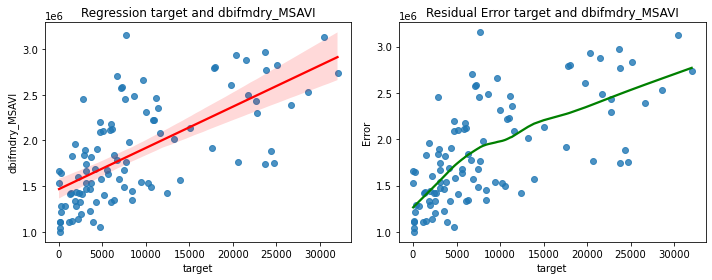

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  23.317929957570932
intersept:  932469.2458793124
r2:  0.6034898693080907
P_value:  1.9013622290740357e-11
std error:  3.0809188796354743


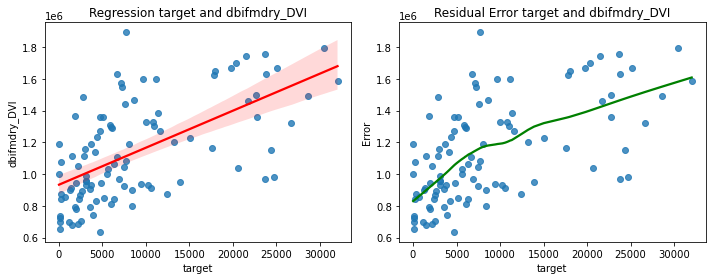

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  49.392502571386544
intersept:  1700688.1269894207
r2:  0.6796553277585379
P_value:  4.032935648093781e-15
std error:  5.330784719388934


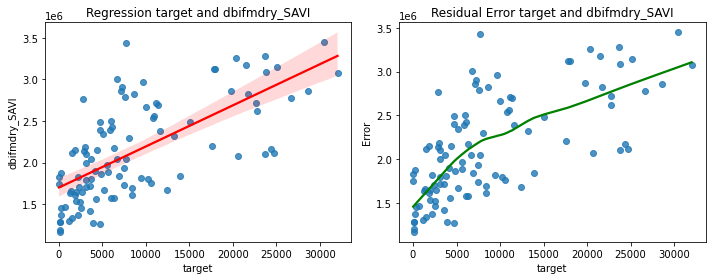

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  105.15748867336653
intersept:  2938240.1336763846
r2:  0.739748881074143
P_value:  6.641604137583814e-19
std error:  9.565231262685488


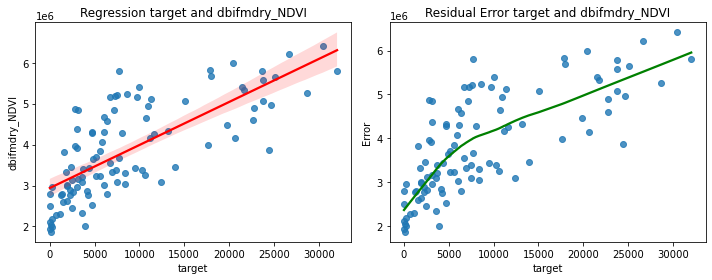

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743


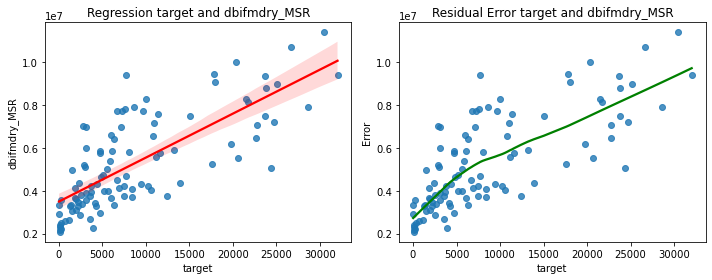

--------------------------------------------------
Residuals
slope:  205.284408196788
intersept:  3494338.2978207176
r2:  0.753092234499504
P_value:  6.883189617431983e-20
std error:  17.934016011897743


In [56]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

In [57]:
#df_ml.to_csv(, index=False)
df_ml.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\gt1000lt40000_3std_no_null.csv".format(drive, date), index=False)

In [58]:
df_ml.describe()

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
count   102.00      102.00    102.00    102.00     102.00    102.00    102.00   
mean   8756.26       18.82      1.35      2.29       1.95     36.27      0.36   
std    8144.75        2.95      2.88      3.42       3.16     59.28      0.86   
min      18.48       16.00      0.00      0.00       0.00      0.00      0.00   
25%    2826.35       16.00      0.00      0.00       0.00      0.00      0.00   
50%    6069.58       20.00      0.00      0.00       0.00      0.00      0.00   
75%   11298.70       20.00      0.00      6.00       3.32     74.75      0.00   
max   32025.21       25.00     10.00     11.00      10.25    205.00      3.48   

       fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
count    102.00      102.00      102.00  ...         102.00       102.00   
mean       1.93        1.90        1.70  ...    -1619173.81   1619173.81   
std        3.29        3.30        3.07  ...      406129.55    406129.55   
min        0.00        0.00        0.00  ...    -2453826.00     62735.00   
25%        0.00        0.00        0.00  ...    -1919013.75   1302843.50   
50%        0.00        0.00        0.00  ...    -1654374.00   1654374.00   
75%        2.88        2.75        2.00  ...    -1302843.50   1919013.75   
max       10.00       10.00       11.00  ...      -62735.00   2453826.00   

       dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
count        102.00         102.00         102.00          102.00   
mean     1688378.45     -662211.41     1406323.53      1862982.18   
std      1570417.97     1068685.16      278392.24       553628.28   
min      -901894.00    -2534954.00      869000.00      1001333.00   
25%       352208.50    -1499950.75     1199000.00      1426531.00   
50%      1526752.00     -834963.50     1367500.00      1750876.50   
75%      2830155.75       92484.25     1600000.00      2280385.00   
max      5095458.00     1657346.00     2045000.00      3153809.00   

       dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
count        102.00         102.00         102.00        102.00  
mean     1136647.06     2133181.63     3859026.25    5291861.56  
std       314700.60      591902.08     1157799.75    2220165.55  
min       636000.00     1169041.00     1868958.00    2081843.00  
25%       901250.00     1669661.50     2971118.75    3584580.50  
50%      1069500.00     2047057.50     3657716.00    4674605.50  
75%      1357000.00     2607574.50     4859245.75    7001419.50  
max      1892000.00     3448807.00     6413744.00   11393565.00  

[8 rows x 106 columns]

In [59]:
# Check for null values
null_values = df_ml.isnull().sum()

In [60]:
null_values

target            0
fire_count        0
fire_min          0
fire_max          0
fire_mean         0
                 ..
dbifmdry_MSAVI    0
dbifmdry_DVI      0
dbifmdry_SAVI     0
dbifmdry_NDVI     0
dbifmdry_MSR      0
Length: 106, dtype: int64

In [61]:
df = df_ml

In [62]:
# Function to check if a value is in scientific notation
def is_scientific_notation(value):
    try:
        float_value = float(value)
        return '{:e}'.format(float_value) == value.lower()
    except ValueError:
        return False

# Check for scientific notation in each cell
for column in df.columns:
    for value in df[column]:
        if is_scientific_notation(str(value)):
            print(f"Column {column}: {value} is in scientific notation")

# Model

### Split off unseen data

In [63]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [64]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(57, 105) (57,)
(25, 105) (25,)


### Plot up Histograms for train and test datasets

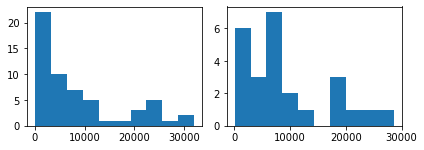

In [65]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [66]:
#print(xdata1)

In [67]:
print(ydata)

[1.8942000e+03 1.5361500e+03 1.1642400e+03 4.7360132e+03 1.9475867e+03
 2.5408459e+03 1.7966666e+03 2.3572266e+03 2.6087600e+03 1.9209960e+03
 2.1469141e+04 3.7422000e+03 2.2699391e+04 4.8727769e+03 3.1569021e+03
 7.7112935e+03 3.1231201e+03 1.7994760e+04 3.9154500e+03 2.2152900e+03
 6.8991998e+02 3.6158325e+03 5.6064385e+03 2.4670801e+04 3.0861599e+03
 6.0060000e+03 6.3602002e+03 5.1737070e+03 2.4740100e+03 8.4137900e+03
 1.1338128e+04 2.6636295e+04 1.2432934e+04 7.2401177e+03 2.4024001e+02
 2.4024001e+02 1.8480000e+01 1.6632001e+02 2.9567999e+02 1.2936000e+02
 6.6990000e+03 5.5439999e+01 1.1596200e+04 2.2176001e+03 4.7239990e+03
 3.6483931e+03 7.7153999e+03 4.7171880e+03 1.3490400e+03 3.0861599e+03
 7.3919998e+01 7.1505176e+03 1.0763322e+04 7.4785898e+03 2.0631123e+04
 6.7264146e+03 8.6271875e+03 2.9932466e+03 5.1178052e+03 4.3276240e+03
 2.8244580e+03 5.8816987e+03 6.9220376e+03 2.4414131e+04 3.0472447e+04
 1.7598352e+04 9.9955098e+03 2.3807330e+04 1.3212728e+04 1.0982860e+04
 7.552

In [68]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=0)



if mdl == "rfr":

    # Define model
    model = rfr()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [2, 10, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
        'max_depth': [None, 2, 3, 4, 5, 10, 20],
        #'min_samples_split': [2, 3, 4, 5, 10],
        #'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }
elif mdl == "gbr":
    # Define model
    model = gbr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }

elif mdl == "abr":
    # Define model
    model = abr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }
else:
    print("ERROR__"*100)

# Define custom scorer for RMSE
def custom_rmse_scorer(y_true, y_pred):
    rmse = -np.sqrt(mean_squared_error(y_true, y_pred))
    #print("rmse: ", rmse)
    return rmse

# Define custom scorer for MAE
def custom_mae_scorer(y_true, y_pred):
    mae = -mean_absolute_error(y_true, y_pred)
    #print("mae: ", mae)
    return mae

# Define custom scorer for MAE
def custom_r2_scorer(y_true, y_pred):
    # Mean of true target values
    y_mean = np.mean(y_true)

    # Calculate sum of squares of residuals
    ss_residual = np.sum((y_true - y_pred) ** 2)
    #print("ss_residual: ", ss_residual)

    # Calculate sum of squares of total
    ss_total = np.sum((y_true - y_mean) ** 2)
    #print("ss_total: ", ss_total)
    
    # Calculate R^2
    r2 = 1 - (ss_residual / ss_total)
    print("r2: ", r2)


    #r2 = r2_score(y_true, y_pred)
    #print("r2: ", r2)
    return r2

# Make it a scorer
#rmse_scorer = make_scorer(custom_rmse_scorer)
#mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)

# def custom_r2_scorer(y_true, y_pred):

#     r2 = r2_score(y_true, y_pred)
#     print("r2: ", r2)
#     return r2

# Make it a scorer
rmse_scorer = make_scorer(custom_rmse_scorer)
mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)
# -------------------------------------------------------------------

# Create GridSearchCV object with RMSE scoring
grid_search_rmse = GridSearchCV(model, param_grid, scoring=rmse_scorer, cv=5)
grid_search_rmse.fit(X_train, y_train)


print(mdl)
print("-"*100)
# Print the best score and parameters
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)

# Create GridSearchCV object with MAE scoring
grid_search_mae = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search_mae.fit(X_train, y_train)

# Print the best score and parameters
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)

# Create GridSearchCV object with r2 scoring
grid_search_r2 = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search_r2.fit(X_train, y_train)

# Print the best score and parameters
print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2 Best Parameters: ", grid_search_r2.best_params_)

gbr
----------------------------------------------------------------------------------------------------
RMSE Best Score:  -6397.247267768405
RMSE Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 300}
MAE Best Score:  -4365.283268041858
MAE Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 150}
r2:  0.018052735042913826
r2:  -0.18253883642615198
r2:  -0.8637364173112585
r2:  0.012470109296813248
r2:  -0.041906153973147564
r2:  0.06565604524001656
r2:  -0.15407025681786912
r2:  -0.7718538773838122
r2:  0.03493950643659072
r2:  -0.012421047607222402
r2:  0.1404740547538812
r2:  -0.1103756110448546
r2:  -0.6474100354458818
r2:  0.0836077621109993
r2:  0.037978664506663096
r2:  0.45034136837846794
r2:  0.040128920472447316
r2:  -0.15744178463728997
r2:  0.33080209101356917
r2:  0.35397671272195785
r2:  0.5131408347909976
r2:  -0.008725681060120616
r2:  0.0522166535536035
r2:  0.4403938243728982
r2:  0.5538236848196437
r2:  0.47547691933511715
r2:  -0.075922838907311
r2:  0.1

In [72]:
# Get best RMSE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_rmse.best_estimator_
fac = "RMSE"

In [76]:
# Get best MAE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_mae.best_estimator_
fac = "MAE"


In [71]:
# Get best R2 parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_r2.best_estimator_
fac = "r2"

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [77]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.91
Fitted model mse = 6443399.81
Fitted model rmse = 2538.385276597915
n = 57


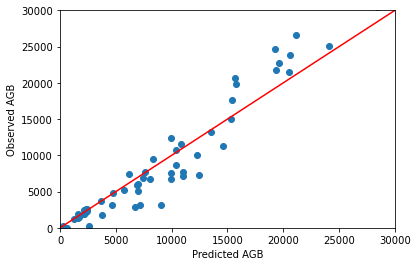

In [126]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('Fitted model rmse =', np.sqrt(mean_squared_error(y_1, rfrLCHM.predict(X_1))))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.273218477563704
MSE = 45632484.897
RMSE = 6755.182
bias = 869.742
n = 25


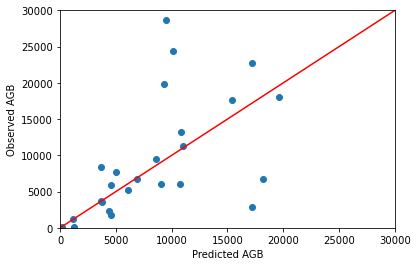

In [79]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                band                      n
5     dbifmdry_GNDVI    0.27667484835889666
7   b2_dp1fm_dry_p50    0.27397825988250457
9        b1_hsd_mean    0.20673799870780107
4  b1_dbifm_dry_mean    0.07829581150609098
3     dbifmdry_GSAVI     0.0760911490768493
6   b3_dp1fm_dry_p50    0.04033596706035522
8       dbifmdry_r53   0.029535082426373083
0           fire_max   0.009769059290722443
1          fire_mean   0.007078690255334662
2   b1_fdc_dry_major  0.0015031334350720624


<Figure size 720x432 with 0 Axes>

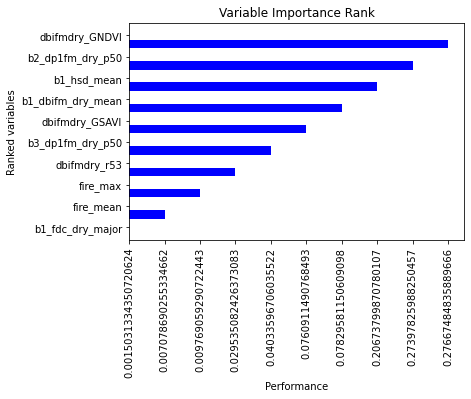

In [127]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [128]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [129]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    10 non-null     object
 1   n       10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [130]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 5 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    10 non-null     object
 1   n       10 non-null     object
dtypes: object(2)
memory usage: 240.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 5 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    10 non-null     object 
 1   n       10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [131]:
#Plot has value at the top with very small n value 

In [132]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(10)

In [133]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [134]:
column_var = df_var.band.tolist()

In [135]:
column_var.insert(0, 'target')

In [136]:
column_var

['target',
 'dbifmdry_GNDVI',
 'b2_dp1fm_dry_p50',
 'b1_hsd_mean',
 'b1_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'b3_dp1fm_dry_p50',
 'dbifmdry_r53',
 'fire_max',
 'fire_mean',
 'b1_fdc_dry_major']

In [137]:
model_data

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
7    1894.20       20.00      0.00      0.00       0.00      0.00      0.00   
8    1536.15       16.00      0.00      0.00       0.00      0.00      0.00   
9    1164.24       20.00     10.00     10.00      10.00    200.00      0.00   
10   4736.01       16.00      0.00      0.00       0.00      0.00      0.00   
17   1947.59       20.00     10.00     11.00      10.25    205.00      0.43   
..       ...         ...       ...       ...        ...       ...       ...   
182 32025.21       20.00      7.00      7.00       7.00    140.00      0.00   
183 22731.51       20.00      0.00      5.00       2.25     45.00      2.49   
184  9471.00       20.00      0.00      8.00       7.60    152.00      1.74   
185 19813.34       16.00      0.00      0.00       0.00      0.00      0.00   
187 25116.35       16.00      0.00      0.00       0.00      0.00      0.00   

     fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
7        0.00        0.00        0.00  ...    -1615977.00   1615977.00   
8        0.00        0.00        0.00  ...    -1510107.00   1510107.00   
9       10.00       10.00       10.00  ...    -1876268.00   1876268.00   
10       0.00        0.00        0.00  ...    -1777222.00   1777222.00   
17      10.00       10.00       11.00  ...    -1786192.00   1786192.00   
..        ...         ...         ...  ...            ...          ...   
182      7.00        7.00        7.00  ...     -902184.00    902184.00   
183      0.00        0.00        5.00  ...    -1435445.00   1435445.00   
184      8.00        8.00        0.00  ...    -1149782.00   1149782.00   
185      0.00        0.00        0.00  ...    -2002328.00   2002328.00   
187      0.00        0.00        0.00  ...    -1377778.00   1377778.00   

     dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
7      2582020.00     -100570.00     1809000.00      1962156.00    1368000.00   
8      -175857.00    -1953125.00      934000.00      1116644.00     680000.00   
9       269231.00    -1603774.00     1068000.00      1105046.00     698000.00   
10      310559.00    -1019362.00      920000.00      1050977.00     636000.00   
17      274190.00    -1358872.00     1345000.00      1442115.00     944000.00   
..            ...            ...            ...             ...           ...   
182    3841717.00      922882.00     1681000.00      2738959.00    1586000.00   
183    2511305.00      372407.00     1541000.00      2298430.00    1362000.00   
184     -32626.00    -1256857.00     1121000.00      1544343.00     936000.00   
185    3735369.00      567737.00     2012000.00      2608361.00    1668000.00   
187    4443054.00     1184880.00     1823000.00      2830628.00    1668000.00   

     dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
7       2151394.00     3014544.00    3649511.00  
8       1339286.00     2599388.00    3047909.00  
9       1302239.00     2296053.00    2633573.00  
10      1268955.00     2525814.00    2945566.00  
17      1648428.00     2629526.00    3090187.00  
..             ...            ...           ...  
182     3076028.00     5801024.00    9398624.00  
183     2623267.00     4885222.00    7059421.00  
184     1816300.00     3428571.00    4295028.00  
185     2865979.00     4471850.00    6179761.00  
187     3147962.00     5658073.00    8990129.00  

[82 rows x 106 columns]

In [138]:
select_df = model_data[column_var]

In [139]:
df_corr = select_df.corr()
df_corr

target  dbifmdry_GNDVI  b2_dp1fm_dry_p50  b1_hsd_mean  \
target               1.00            0.73              0.72         0.70   
dbifmdry_GNDVI       0.73            1.00              0.90         0.79   
b2_dp1fm_dry_p50     0.72            0.90              1.00         0.81   
b1_hsd_mean          0.70            0.79              0.81         1.00   
b1_dbifm_dry_mean   -0.64           -0.85             -0.78        -0.71   
dbifmdry_GSAVI       0.60            0.85              0.76         0.67   
b3_dp1fm_dry_p50    -0.57           -0.64             -0.78        -0.70   
dbifmdry_r53         0.44            0.63              0.54         0.40   
fire_max             0.04            0.01              0.02         0.13   
fire_mean            0.04           -0.00              0.00         0.12   
b1_fdc_dry_major     0.64            0.82              0.90         0.75   

                   b1_dbifm_dry_mean  dbifmdry_GSAVI  b3_dp1fm_dry_p50  \
target                         -0.64            0.60             -0.57   
dbifmdry_GNDVI                 -0.85            0.85             -0.64   
b2_dp1fm_dry_p50               -0.78            0.76             -0.78   
b1_hsd_mean                    -0.71            0.67             -0.70   
b1_dbifm_dry_mean               1.00           -0.51              0.55   
dbifmdry_GSAVI                 -0.51            1.00             -0.54   
b3_dp1fm_dry_p50                0.55           -0.54              1.00   
dbifmdry_r53                   -0.76            0.25             -0.25   
fire_max                       -0.15           -0.08             -0.23   
fire_mean                      -0.13           -0.09             -0.21   
b1_fdc_dry_major               -0.78            0.66             -0.69   

                   dbifmdry_r53  fire_max  fire_mean  b1_fdc_dry_major  
target                     0.44      0.04       0.04              0.64  
dbifmdry_GNDVI             0.63      0.01      -0.00              0.82  
b2_dp1fm_dry_p50           0.54      0.02       0.00              0.90  
b1_hsd_mean                0.40      0.13       0.12              0.75  
b1_dbifm_dry_mean         -0.76     -0.15      -0.13             -0.78  
dbifmdry_GSAVI             0.25     -0.08      -0.09              0.66  
b3_dp1fm_dry_p50          -0.25     -0.23      -0.21             -0.69  
dbifmdry_r53               1.00      0.01       0.03              0.51  
fire_max                   0.01      1.00       0.97              0.02  
fire_mean                  0.03      0.97       1.00              0.00  
b1_fdc_dry_major           0.51      0.02       0.00              1.00

In [140]:
dfsort.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.csv".format(var_, d_type, fac, mdl)))
df_corr.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_select_variable_corrolation.csv".format(var_, d_type, fac, mdl)))

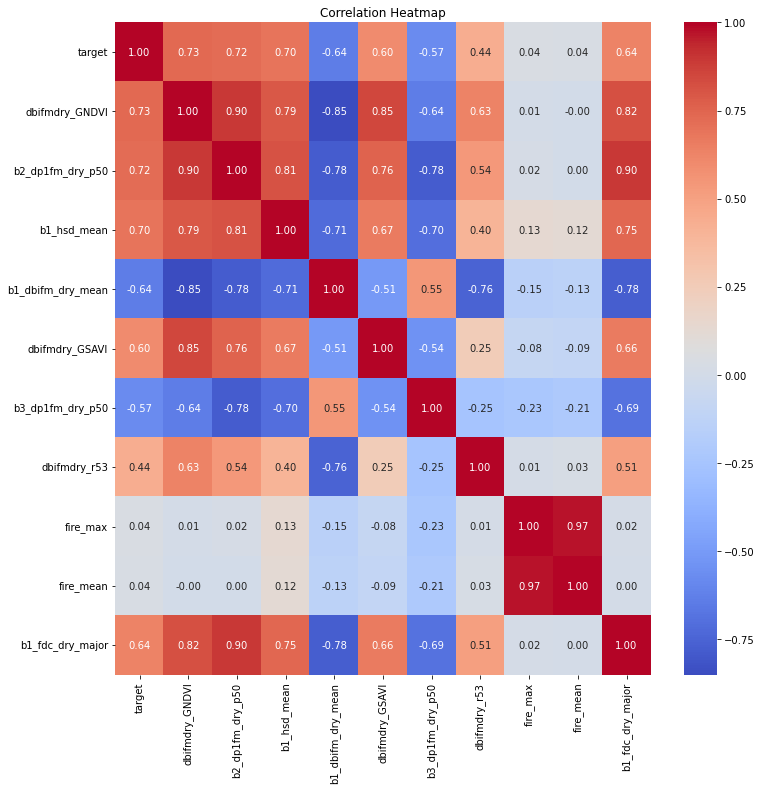

In [141]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [142]:
select_df

target  dbifmdry_GNDVI  b2_dp1fm_dry_p50  b1_hsd_mean  \
7    1894.20      4415426.00             10.00       100.87   
8    1536.15      3954276.00              7.00       101.86   
9    1164.24      4000000.00              4.00       101.43   
10   4736.01      4118174.00             14.50       102.83   
17   1947.59      4217623.00             10.50       102.03   
..       ...             ...               ...          ...   
182 32025.21      6369837.00             52.50       104.22   
183 22731.51      5906478.00             45.00       104.70   
184  9471.00      4404715.00             28.00       103.50   
185 19813.34      5942115.00             42.00       103.35   
187 25116.35      6527032.00             45.00       104.82   

     b1_dbifm_dry_mean  dbifmdry_GSAVI  b3_dp1fm_dry_p50  dbifmdry_r53  \
7               616.44      2982851.00             85.00   19008340.00   
8               465.33      1903015.00             78.00   25277873.00   
9               449.42      2088657.00             81.00   22043661.00   
10              384.42      1907658.00             48.50   20552999.00   
17              507.38      2463671.00             65.50   22516287.00   
..                 ...             ...               ...           ...   
182             273.33      3300825.00             40.00   31267054.00   
183             328.00      3037850.00             40.00   27004673.00   
184             441.11      2228628.00             46.00   26290382.00   
185             402.33      3598855.00             54.00   23351281.00   
187             240.50      3508918.00             51.00   28431194.00   

     fire_max  fire_mean  b1_fdc_dry_major  
7        0.00       0.00              2.00  
8        0.00       0.00              1.00  
9       10.00      10.00              1.00  
10       0.00       0.00              2.00  
17      11.00      10.25              2.00  
..        ...        ...               ...  
182      7.00       7.00              3.00  
183      5.00       2.25              3.00  
184      8.00       7.60              2.00  
185      0.00       0.00              3.00  
187      0.00       0.00              3.00  

[82 rows x 11 columns]

# Rerun on Selected data

In [143]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(57, 10) (57,)
(25, 10) (25,)


In [144]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

RandomForestRegressor(random_state=RandomState(MT19937) at 0x23C3EE88D08)

In [145]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [146]:
select_df

target  dbifmdry_GNDVI  b2_dp1fm_dry_p50  b1_hsd_mean  \
7    1894.20      4415426.00             10.00       100.87   
8    1536.15      3954276.00              7.00       101.86   
9    1164.24      4000000.00              4.00       101.43   
10   4736.01      4118174.00             14.50       102.83   
17   1947.59      4217623.00             10.50       102.03   
..       ...             ...               ...          ...   
182 32025.21      6369837.00             52.50       104.22   
183 22731.51      5906478.00             45.00       104.70   
184  9471.00      4404715.00             28.00       103.50   
185 19813.34      5942115.00             42.00       103.35   
187 25116.35      6527032.00             45.00       104.82   

     b1_dbifm_dry_mean  dbifmdry_GSAVI  b3_dp1fm_dry_p50  dbifmdry_r53  \
7               616.44      2982851.00             85.00   19008340.00   
8               465.33      1903015.00             78.00   25277873.00   
9               449.42      2088657.00             81.00   22043661.00   
10              384.42      1907658.00             48.50   20552999.00   
17              507.38      2463671.00             65.50   22516287.00   
..                 ...             ...               ...           ...   
182             273.33      3300825.00             40.00   31267054.00   
183             328.00      3037850.00             40.00   27004673.00   
184             441.11      2228628.00             46.00   26290382.00   
185             402.33      3598855.00             54.00   23351281.00   
187             240.50      3508918.00             51.00   28431194.00   

     fire_max  fire_mean  b1_fdc_dry_major  
7        0.00       0.00              2.00  
8        0.00       0.00              1.00  
9       10.00      10.00              1.00  
10       0.00       0.00              2.00  
17      11.00      10.25              2.00  
..        ...        ...               ...  
182      7.00       7.00              3.00  
183      5.00       2.25              3.00  
184      8.00       7.60              2.00  
185      0.00       0.00              3.00  
187      0.00       0.00              3.00  

[82 rows x 11 columns]

## Re-train model on selected paramiters

Fitted model r2 = 0.93
Fitted model mse = 5709100.84
n = 57


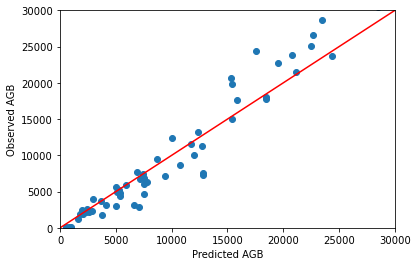

In [147]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('RMSE =', format(np.sqrt(np.mean((y_1 - rfrLCHM.predict(X_1))**2)), '.3f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1,30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                band                      n
0     dbifmdry_GNDVI    0.42778784061906344
1   b2_dp1fm_dry_p50    0.13874883251914708
5   b3_dp1fm_dry_p50    0.11835037579608716
3  b1_dbifm_dry_mean    0.10664896652704382
2        b1_hsd_mean    0.09551624253964074
4     dbifmdry_GSAVI    0.06602164163534202
6       dbifmdry_r53   0.035106341094865386
7           fire_max   0.005818061221103879
8          fire_mean   0.005097870405771216
9   b1_fdc_dry_major  0.0009038276419352878


<Figure size 720x432 with 0 Axes>

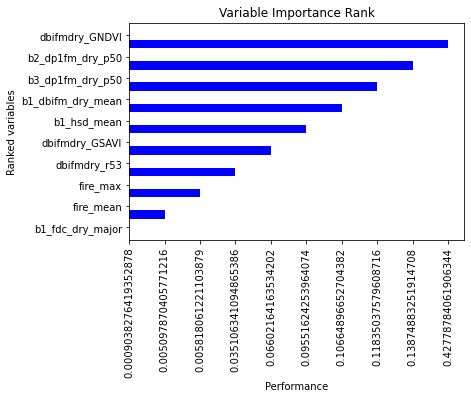

In [148]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_select_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.396876080796964
MSE = 29628141.849
RMSE = 5443.174
bias = -271.626
n = 25


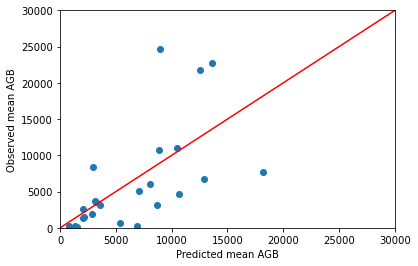

In [149]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [150]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [151]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [152]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
169 13908.65       20.00      8.00      8.00       8.00    160.00      0.00   
128  3603.60       20.00      0.00      0.00       0.00      0.00      0.00   
107    73.92       20.00      0.00      0.00       0.00      0.00      0.00   
80  10273.34       16.00      0.00      0.00       0.00      0.00      0.00   
39   8031.45       25.00      2.00      2.00       2.00     50.00      0.00   
129  6375.60       20.00      0.00      0.00       0.00      0.00      0.00   
52   6044.74       20.00      0.00      6.00       1.80     36.00      2.75   
117  9708.97       20.00      0.00      0.00       0.00      0.00      0.00   
18   1293.60       20.00      0.00      0.00       0.00      0.00      0.00   
146  4142.09       16.00      0.00      0.00       0.00      0.00      0.00   
32  11180.40       20.00      0.00      5.00       0.75     15.00      1.79   
37   5588.14       20.00      0.00      7.00       3.85     77.00      3.48   
60   2832.03       20.00      0.00      0.00       0.00      0.00      0.00   
158  8402.81       16.00      7.00      7.00       7.00    112.00      0.00   
82   7432.81       20.00      0.00      0.00       0.00      0.00      0.00   
119  4268.88       25.00      0.00      0.00       0.00      0.00      0.00   
72  23737.56       25.00      0.00      0.00       0.00      0.00      0.00   
12   1549.09       16.00      0.00      0.00       0.00      0.00      0.00   
178 20381.03       16.00      0.00      0.00       0.00      0.00      0.00   
156 10569.77       20.00      0.00      7.00       5.60    112.00      2.80   

     fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
169      8.00        8.00        8.00  ...    -1782438.00   1782438.00   
128      0.00        0.00        0.00  ...    -1134904.00   1134904.00   
107      0.00        0.00        0.00  ...    -2095539.00   2095539.00   
80       0.00        0.00        0.00  ...    -1733506.00   1733506.00   
39       2.00        2.00        2.00  ...    -1742031.00   1742031.00   
129      0.00        0.00        0.00  ...    -1204943.00   1204943.00   
52       0.00        0.00        6.00  ...    -2085216.00   2085216.00   
117      0.00        0.00        0.00  ...    -1483474.00   1483474.00   
18       0.00        0.00        0.00  ...    -1521099.00   1521099.00   
146      0.00        0.00        0.00  ...    -1878130.00   1878130.00   
32       0.00        0.00        5.00  ...    -1870694.00   1870694.00   
37       7.00        7.00        0.00  ...    -1880597.00   1880597.00   
60       0.00        0.00        0.00  ...    -1649555.00   1649555.00   
158      7.00        7.00        7.00  ...    -1973392.00   1973392.00   
82       0.00        0.00        0.00  ...    -2035398.00   2035398.00   
119      0.00        0.00        0.00  ...    -1638298.00   1638298.00   
72       0.00        0.00        0.00  ...     -930233.00    930233.00   
12       0.00        0.00        0.00  ...    -1300000.00   1300000.00   
178      0.00        0.00        0.00  ...    -1183432.00   1183432.00   
156      7.00        7.00        0.00  ...    -2453826.00   2453826.00   

     dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
169    1204600.00     -589731.00     1224000.00      1569315.00     952000.00   
128    -464481.00    -1952344.00     1059000.00      1225028.00     794000.00   
107      34063.00    -2021668.00     1185000.00      1106176.00     720000.00   
80      736411.00    -1526753.00     1198000.00      1531854.00     930000.00   
39     1725363.00     -832948.00     1424000.00      1985566.00    1189000.00   
129    -242424.00    -1996686.00     1078000.00      1348755.00     844000.00   
52      -71124.00    -2068182.00     1132000.00      1330665.00     809000.00   
117    3486502.00      350452.00     1794000.00      2660452.00    1601000.00   
18     1267988.00     -717960.00     1211000.00      1414998.0

In [153]:
c_list = unseen_data.columns.tolist()
c_list

['target',
 'fire_count',
 'fire_min',
 'fire_max',
 'fire_mean',
 'fire_sum',
 'fire_std',
 'fire_med',
 'fire_major',
 'fire_minor',
 'burnt_enco',
 'fire_sn_ord',
 'fire_f',
 'fire_tot',
 'since_fire',
 'fire_gap',
 'fire_pois1_2',
 'fire_pois1_5',
 'fire_pois1_10',
 'tot_an_emsi_avg_si',
 'tot_an_drsi_avg_si',
 'tot_avg_emse_djf',
 'tot_avg_emse_mam',
 'tot_avg_emse_jja',
 'tot_avg_emse_son',
 'tot_avg_emse_dry',
 'tot_avg_emse_wet',
 'tot_avg_emse_annual',
 'tot_avg_drse_djf',
 'tot_avg_drse_mam',
 'tot_avg_drse_jja',
 'tot_avg_drse_son',
 'tot_avg_drse_dry',
 'tot_avg_drse_wet',
 'tot_avg_drse_annual',
 'b1_wfp_dry_mean',
 'b1_wfp_dry_p50',
 'b1_wfp_dry_p99',
 'b1_wdc_dry_major',
 'b1_n17_dry_major',
 'b1_hsd_mean',
 'b1_hsd_p50',
 'b1_hsd_p99',
 'b1_hmc_mean',
 'b1_hmc_p50',
 'b1_hmc_p99',
 'b1_hcv_mean',
 'b1_hcv_p50',
 'b1_hcv_p99',
 'b1_h99_mean',
 'b1_h99_p50',
 'b1_h99_p99',
 'b1_fdc_dry_major',
 'b1_ccw_dry_mean',
 'b1_ccw_dry_p50',
 'b1_ccw_dry_p99',
 'b1_dbifm_dry_mean',

In [154]:
df = unseen_data[column_var]

In [155]:
df

target  dbifmdry_GNDVI  b2_dp1fm_dry_p50  b1_hsd_mean  \
169 13908.65      4939467.00             28.00       103.84   
128  3603.60      3384468.00              5.50       101.22   
107    73.92      4031984.00              5.00       102.52   
80  10273.34      4838449.00             24.00       103.17   
39   8031.45      5610717.00             34.00       103.81   
129  6375.60      3869347.00             13.50       101.13   
52   6044.74      4800679.00             14.00       101.55   
117  9708.97      6181943.00             47.00       103.29   
18   1293.60      4120449.00             16.00       101.99   
146  4142.09      4491933.00             14.50       102.27   
32  11180.40      5598278.00             35.00       103.70   
37   5588.14      5346450.00             24.00       102.94   
60   2832.03      5260295.00             22.00       102.59   
158  8402.81      4953532.00             23.50       101.95   
82   7432.81      5071194.00             10.00       102.26   
119  4268.88      4205676.00             10.00       102.08   
72  23737.56      5735375.00             38.50       103.11   
12   1549.09      4874816.00             36.00       103.20   
178 20381.03      6705969.00             51.00       104.85   
156 10569.77      5292181.00             28.00       103.01   

     b1_dbifm_dry_mean  dbifmdry_GSAVI  b3_dp1fm_dry_p50  dbifmdry_r53  \
169             409.58      2455202.00             51.00   23164088.00   
128             727.42      1954115.00             72.00   23909673.00   
107             558.00      2238947.00             86.00   23151751.00   
80              395.56      2403692.00             72.00   27542248.00   
39              302.11      2833643.00             62.00   29540230.00   
129             610.83      2076805.00             74.50   26600842.00   
52              368.88      2307692.00             81.00   28364268.00   
117             301.67      3405467.00             49.00   29280725.00   
18              484.56      2288072.00             65.00   20396292.00   
146             558.67      2789757.00             76.50   21897985.00   
32              454.44      3449028.00             63.00   23777888.00   
37              317.88      2555192.00             72.50   30900957.00   
60              364.42      2681542.00             74.50   30388682.00   
158             336.69      2235738.00             57.00   29687765.00   
82              388.67      2692208.00             87.00   29515409.00   
119             537.22      2218981.00             84.00   26968928.00   
72              209.31      2304144.00             51.00   34829832.00   
12              410.83      2573872.00             41.50   24070796.00   
178             230.33      3539020.00             46.00   31940079.00   
156             322.92      2596231.00             48.00   25798905.00   

     fire_max  fire_mean  b1_fdc_dry_major  
169      8.00       8.00              3.00  
128      0.00       0.00              1.00  
107      0.00       0.00              1.00  
80       0.00       0.00              2.00  
39       2.00       2.00              3.00  
129      0.00       0.00              2.00  
52       6.00       1.80              2.00  
117      0.00       0.00              3.00  
18       0.00       0.00              2.00  
146      0.00       0.00              2.00  
32       5.00       0.75              3.00  
37       7.00       3.85              2.00  
60       0.00       0.00              2.00  
158      7.00       7.00              2.00  
82       0.00       0.00              2.00  
119      0.00       0.00              2.00  
72       0.00       0.00              3.00  
12       0.00       0.00              3.00  
178      0.00       0.00              3.00  
156      7.00       5.60              2.00

In [156]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

(20, 11)


In [157]:
# dfx = df1[:1]
# dfy = df1[1:]

In [158]:
df1.columns

Index(['target', 'dbifmdry_GNDVI', 'b2_dp1fm_dry_p50', 'b1_hsd_mean',
       'b1_dbifm_dry_mean', 'dbifmdry_GSAVI', 'b3_dp1fm_dry_p50',
       'dbifmdry_r53', 'fire_max', 'fire_mean', 'b1_fdc_dry_major'],
      dtype='object')

In [159]:
column_var

['target',
 'dbifmdry_GNDVI',
 'b2_dp1fm_dry_p50',
 'b1_hsd_mean',
 'b1_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'b3_dp1fm_dry_p50',
 'dbifmdry_r53',
 'fire_max',
 'fire_mean',
 'b1_fdc_dry_major']

In [160]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 169 to 156
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             20 non-null     float64
 1   dbifmdry_GNDVI     20 non-null     float64
 2   b2_dp1fm_dry_p50   20 non-null     float64
 3   b1_hsd_mean        20 non-null     float64
 4   b1_dbifm_dry_mean  20 non-null     float64
 5   dbifmdry_GSAVI     20 non-null     float64
 6   b3_dp1fm_dry_p50   20 non-null     float64
 7   dbifmdry_r53       20 non-null     float64
 8   fire_max           20 non-null     float64
 9   fire_mean          20 non-null     float64
 10  b1_fdc_dry_major   20 non-null     float64
dtypes: float64(11)
memory usage: 1.9 KB


In [161]:
df1

target  dbifmdry_GNDVI  b2_dp1fm_dry_p50  b1_hsd_mean  \
169 13908.65      4939467.00             28.00       103.84   
128  3603.60      3384468.00              5.50       101.22   
107    73.92      4031984.00              5.00       102.52   
80  10273.34      4838449.00             24.00       103.17   
39   8031.45      5610717.00             34.00       103.81   
129  6375.60      3869347.00             13.50       101.13   
52   6044.74      4800679.00             14.00       101.55   
117  9708.97      6181943.00             47.00       103.29   
18   1293.60      4120449.00             16.00       101.99   
146  4142.09      4491933.00             14.50       102.27   
32  11180.40      5598278.00             35.00       103.70   
37   5588.14      5346450.00             24.00       102.94   
60   2832.03      5260295.00             22.00       102.59   
158  8402.81      4953532.00             23.50       101.95   
82   7432.81      5071194.00             10.00       102.26   
119  4268.88      4205676.00             10.00       102.08   
72  23737.56      5735375.00             38.50       103.11   
12   1549.09      4874816.00             36.00       103.20   
178 20381.03      6705969.00             51.00       104.85   
156 10569.77      5292181.00             28.00       103.01   

     b1_dbifm_dry_mean  dbifmdry_GSAVI  b3_dp1fm_dry_p50  dbifmdry_r53  \
169             409.58      2455202.00             51.00   23164088.00   
128             727.42      1954115.00             72.00   23909673.00   
107             558.00      2238947.00             86.00   23151751.00   
80              395.56      2403692.00             72.00   27542248.00   
39              302.11      2833643.00             62.00   29540230.00   
129             610.83      2076805.00             74.50   26600842.00   
52              368.88      2307692.00             81.00   28364268.00   
117             301.67      3405467.00             49.00   29280725.00   
18              484.56      2288072.00             65.00   20396292.00   
146             558.67      2789757.00             76.50   21897985.00   
32              454.44      3449028.00             63.00   23777888.00   
37              317.88      2555192.00             72.50   30900957.00   
60              364.42      2681542.00             74.50   30388682.00   
158             336.69      2235738.00             57.00   29687765.00   
82              388.67      2692208.00             87.00   29515409.00   
119             537.22      2218981.00             84.00   26968928.00   
72              209.31      2304144.00             51.00   34829832.00   
12              410.83      2573872.00             41.50   24070796.00   
178             230.33      3539020.00             46.00   31940079.00   
156             322.92      2596231.00             48.00   25798905.00   

     fire_max  fire_mean  b1_fdc_dry_major  
169      8.00       8.00              3.00  
128      0.00       0.00              1.00  
107      0.00       0.00              1.00  
80       0.00       0.00              2.00  
39       2.00       2.00              3.00  
129      0.00       0.00              2.00  
52       6.00       1.80              2.00  
117      0.00       0.00              3.00  
18       0.00       0.00              2.00  
146      0.00       0.00              2.00  
32       5.00       0.75              3.00  
37       7.00       3.85              2.00  
60       0.00       0.00              2.00  
158      7.00       7.00              2.00  
82       0.00       0.00              2.00  
119      0.00       0.00              2.00  
72       0.00       0.00              3.00  
12       0.00       0.00              3.00  
178      0.00       0.00              3.00  
156      7.00       5.60              2.00

In [162]:
list(df1.columns)

['target',
 'dbifmdry_GNDVI',
 'b2_dp1fm_dry_p50',
 'b1_hsd_mean',
 'b1_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'b3_dp1fm_dry_p50',
 'dbifmdry_r53',
 'fire_max',
 'fire_mean',
 'b1_fdc_dry_major']

In [163]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [164]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [165]:
xdata1.shape

(82, 10)

In [166]:
ydata.shape

(20, 1)

Predicted data r2 = 0.37920535910683284
MSE = 60859493.179
RMSE = 7801.249
explained_var = 0.410
bias = 1033.254
n = 20


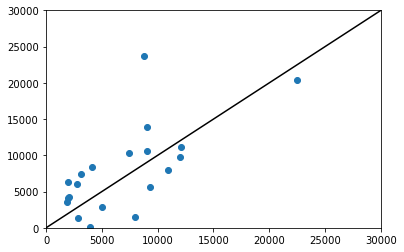

In [167]:
with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata) #,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1, 30000)
plt.ylim(-1, 30000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open("{0}_{1}_{2}_{3}_sel_data".format(var_, d_type, fac, mdl)', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()